In [1]:
id = {'KLONGTEI': 'cluster_1892287670_272491964_272492178',
      'RAMA4': 'cluster_272488163_282390730_66263210_66263222',
      'NARANONG': 'cluster_272488164_272492179_3457051443_61907354',
      'SUNLAKAKHON': 'gneJ83',
      'KASEMRAT': 'cluster_272448137_272555800_272555808_7660045934_7710268409',
      'ATTHAKAWI_RAMA4' : '270329335'}
number_phase = [3,7,6,4,3,3]

In [2]:
# loopdetector = open("loopcoil_name.txt", "r")
# previous = "KASEMRAT"
# ll = []
# for line in loopdetector:
#     idL = line.strip().split(' ')
#     idd = idL[1][5:-1]
# #     print(idd)
#     if ID.loc[idd,'name'].split("_")[0] == previous:
#         ll.append("L"+idd)
#     else :
#         print(previous+"_loopcoil", "=", ll) 
#         previous = ID.loc[idd,'name'].split("_")[0] 
#         ll = []
# print(previous+"_loopcoil", "=", ll) 

In [3]:
# import gym
# from gym import error, spaces
import csv
import lxml.etree as ET
import os, sys
sys.path.append(os.path.join('/home/ring/sumo-svn/', 'tools'))
import traci
import traci.constants as tc
import numpy as np
from sumolib import checkBinary
import datetime
import matplotlib
import matplotlib.pyplot as plt
import torch
import copy
import random
import pandas as pd
from multiprocessing.pool import ThreadPool
from itertools import zip_longest

In [4]:
namelane_csv = pd.read_csv('namelane_KASEMRAT_nodot.csv')
namelane_df = pd.DataFrame(namelane_csv, columns = ['name' , 'id']).dropna()
NAME = namelane_df.set_index('name')
ID = namelane_df.set_index('id')
if NAME.loc['KASEMRAT_EB_0_0_XSXX','id'] == '459551209#3_0':
    print('ok')

ok


In [5]:
NAME.head()

,id
name,
KASEMRAT_EB_0_0_XSXX,459551209#3_0
KASEMRAT_EB_0_1_XSXX,459551209#3_1
KASEMRAT_EB_0_2_XSXX,459551209#3_2
KASEMRAT_EB_0_3_XSRT,459551209#3_3
KASEMRAT_EB_1_0_LSXX,459551209#0_0


In [6]:
ID.loc['820373198#0_3', 'name']

'RAMA4_WB_2_3_XSXX'

In [7]:
namedetector_csv = pd.read_csv('namedetector_KASEMRAT_flow.csv')
namedetector_df = pd.DataFrame(namedetector_csv, columns = ['name' , 'id'])
NAME_D = namedetector_df.set_index('name')
ID_D = namedetector_df.set_index('id')
listdetector = open("namedetector_KASEMRAT_flow.txt", "r")
detector = {}
for l in listdetector:
    l = l.strip().split(' ')
    if len(l)> 1:
        d = []
        for detec in l[2:]:
            if type(NAME_D.loc[detec,'id']) == str:
                d.append(NAME_D.loc[detec,'id'])
            else : d.append(NAME_D.loc[detec,'id'][0])
    if str(l[0])!= '':
        detector[str(l[0])] = d
list_detector= list(detector.keys())

In [8]:
NAME_D.head()

,id
name,
RAMA4_EB_1_4_XSXX,D459492917#0_4
KLONGTEI_EB_0_0_XSXX,D825786400_0
KLONGTEI_EB_0_1_XSXX,D825786400_1
KLONGTEI_EB_0_2_XSXX,D825786400_2
KLONGTEI_EB_0_3_XSXX,D825786400_3


In [9]:
detector

{'RAMA4_EB_FP1_TP3': ['D459492917#0_4', 'D825786400_4'],
 'RAMA4_EB_FP3_TP2': ['D825786400_0',
  'D825786400_1',
  'D825786400_2',
  'D825786400_3',
  'D825786400_4',
  'D459492912#1_0',
  'D459492912#1_1',
  'D459492912#1_2',
  'D459492912#1_3',
  'D459492912#0_0',
  'D459492912#0_1',
  'D459492912#0_2',
  'D459492912#0_3',
  'D752225467_0',
  'D752225467_1',
  'D825786397_0',
  'D825786397_1',
  'D825786397_2',
  'D825786397_3',
  'D825786397_4',
  'D825786383#0_0',
  'D825786383#0_1',
  'D825786383#0_2',
  'D825786383#0_3',
  'D825786410_0',
  'D825786410_1',
  'D825786410_2',
  'D825786410_3',
  'D459492917#0_0',
  'D459492917#0_1',
  'D459492917#0_2',
  'D459492917#0_3',
  'D459492917#0_4'],
 'RAMA4_WB_FP3_TP2': ['D825786415_5'],
 'RAMA4_WB_FP2_TP4': ['D825786415_5'],
 'RAMA4_SB_FP4_TP5': ['D25053655#0_0', 'D25053655#0_1', 'D25053655#0_2'],
 'RAMA4_NB_FP5_TP1': ['D824116545_0',
  'D824116545_1',
  'D824116545_2',
  'D824116548_1',
  'D824116548_2',
  'D824116548_3',
  'D824116547_

In [10]:
# type(NAME_D.loc['KLONGTEI_EB_0_0_XSXX','id'])
len(list(detector.keys()))

31

In [11]:
# ID.loc['']#, '820373198#0', '820373196#0', '482209831#0']

In [12]:
# # RAMA4
# RAMA4_EB_R = [NAME.loc['RAMA4_EB_1_4_XSXX','id'], NAME.loc['RAMA4_EB_0_3_XSRT','id']]
# RAMA4_EB = [NAME.loc['KLONGTEI_EB_5_0_XSXX','id'],NAME.loc['KLONGTEI_EB_5_1_XSXX','id'],NAME.loc['KLONGTEI_EB_5_2_XSXX','id'],NAME.loc['KLONGTEI_EB_5_3_XSXX','id']]
# RAMA4_SB = [NAME.loc['RAMA4_SB_3_1_XSXX','id'],NAME.loc['RAMA4_SB_3_2_XSXX','id']]
# RAMA4_NB = [NAME.loc['RAMA4_NB_0_0_XSXX','id'],NAME.loc['RAMA4_NB_0_1_XSXX','id'],NAME.loc['RAMA4_NB_0_2_XSRT','id'],NAME.loc['RAMA4_NB_1_0_LSXX','id'],NAME.loc['RAMA4_NB_1_1_XSXX','id'],NAME.loc['RAMA4_NB_1_2_XSXX','id'],NAME.loc['RAMA4_NB_1_3_XSXX','id'],NAME.loc['RAMA4_NB_2_0_XSXX','id'],NAME.loc['RAMA4_NB_2_1_XSXX','id'],NAME.loc['RAMA4_NB_2_2_XSXX','id'],NAME.loc['RAMA4_NB_3_0_XSXX','id'],NAME.loc['RAMA4_NB_3_1_XSXX','id']]
# RAMA4_WB = [NAME.loc['RAMA4_WB_0_0_XSXX','id'],NAME.loc['RAMA4_WB_0_1_XSXX','id'],NAME.loc['RAMA4_WB_0_2_XSXX','id'],NAME.loc['RAMA4_WB_0_3_XSXX','id'],NAME.loc['RAMA4_WB_0_4_XSRT','id'],NAME.loc['RAMA4_WB_1_0_LSXX','id'],NAME.loc['RAMA4_WB_1_1_XSXX','id'],NAME.loc['RAMA4_WB_1_2_XSXX','id'],NAME.loc['RAMA4_WB_1_3_XSXX','id'],NAME.loc['RAMA4_WB_1_4_XSXX','id'],NAME.loc['RAMA4_WB_1_5_XSXX','id'],NAME.loc['RAMA4_WB_2_0_XSXX','id'],NAME.loc['RAMA4_WB_2_1_XSXX','id'],NAME.loc['RAMA4_WB_2_2_XSXX','id'],NAME.loc['RAMA4_WB_2_3_XSXX','id'],NAME.loc['RAMA4_WB_3_0_XSXX','id'],NAME.loc['RAMA4_WB_3_1_XSXX','id'],NAME.loc['RAMA4_WB_3_2_XSXX','id'],NAME.loc['RAMA4_WB_4_0_XSXX','id'],NAME.loc['RAMA4_WB_4_1_XSXX','id'],NAME.loc['RAMA4_WB_5_0_LSXX','id'],NAME.loc['RAMA4_WB_5_1_XSXX','id'],NAME.loc['RAMA4_WB_5_2_XSXX','id'],NAME.loc['RAMA4_WB_6_0_LSXX','id'],NAME.loc['RAMA4_WB_6_1_XSXX','id'],NAME.loc['RAMA4_WB_6_2_XSXX','id']]
# RAMA4_WB_R = [NAME.loc['RAMA4_WB_0_4_XSRT','id'], NAME.loc['RAMA4_WB_1_5_XSXX','id'],NAME.loc['RAMA4_WB_2_3_XSXX','id']]

In [13]:
# KLONGTEI_NB = [NAME.loc['KLONGTEI_NB_0_0_LSXX','id'],NAME.loc['KLONGTEI_NB_0_1_XSXX','id'],NAME.loc['KLONGTEI_NB_0_2_XSXX','id'],NAME.loc['KLONGTEI_NB_0_3_XSRT','id'],NAME.loc['KLONGTEI_NB_1_0_LSXX','id'],NAME.loc['KLONGTEI_NB_1_1_XSXX','id'],NAME.loc['KLONGTEI_NB_1_2_XSXX','id'],NAME.loc['KLONGTEI_NB_1_3_XSXX','id'],NAME.loc['KLONGTEI_NB_2_0_LSXX','id'],NAME.loc['KLONGTEI_NB_2_1_XSXX','id'],NAME.loc['KLONGTEI_NB_2_2_XSXX','id'],NAME.loc['KLONGTEI_NB_2_3_XSXX','id']]

In [14]:
# # NARANONG
# NARANONG_EB = [NAME.loc['NARANONG_EB_0_0_LSXX','id'],NAME.loc['NARANONG_EB_0_1_XSRT','id'],NAME.loc['NARANONG_EB_1_0_XSXX','id'],NAME.loc['NARANONG_EB_1_1_XSXX','id'],NAME.loc['NARANONG_EB_2_0_XSXX','id'],NAME.loc['NARANONG_EB_2_1_XSXX','id'],NAME.loc['NARANONG_EB_2_2_XSXX','id'],NAME.loc['NARANONG_EB_3_0_XSXX','id'],NAME.loc['NARANONG_EB_3_1_XSRX','id'],NAME.loc['NARANONG_EB_4_0_LSXX','id'],NAME.loc['NARANONG_EB_4_1_XSXX','id'],NAME.loc['NARANONG_EB_5_0_LSXX','id'],NAME.loc['NARANONG_EB_5_1_XSRX','id']]
# NARANONG_WB = [NAME.loc['NARANONG_WB_0_0_LSXX','id'],NAME.loc['NARANONG_WB_0_1_XSXX','id'],NAME.loc['NARANONG_WB_0_2_XSXX','id'],NAME.loc['NARANONG_WB_0_3_XSRT','id'],NAME.loc['NARANONG_WB_1_0_XSXX','id'],NAME.loc['NARANONG_WB_1_1_XSXX','id'],NAME.loc['NARANONG_WB_1_2_XSXX','id'],NAME.loc['NARANONG_WB_2_0_LSXX','id'],NAME.loc['NARANONG_WB_2_1_XSXX','id'],NAME.loc['NARANONG_WB_2_2_XSXX','id'],NAME.loc['NARANONG_WB_3_0_XSXX','id'],NAME.loc['NARANONG_WB_3_1_XSXX','id'],NAME.loc['NARANONG_WB_3_2_XSXX','id'],NAME.loc['NARANONG_WB_3_3_XSXX','id'],NAME.loc['NARANONG_WB_4_0_XSXX','id'],NAME.loc['NARANONG_WB_4_1_XSXX','id'],NAME.loc['NARANONG_WB_4_2_XSXX','id']]
# NARANONG_SB = [NAME.loc['NARANONG_SB_0_0_LSXX','id'],NAME.loc['NARANONG_SB_0_1_XSXX','id'],NAME.loc['NARANONG_SB_0_2_XSRX','id'],NAME.loc['NARANONG_SB_1_0_LSXX','id'],NAME.loc['NARANONG_SB_1_1_XSXX','id'],NAME.loc['NARANONG_SB_1_2_XSXX','id'],NAME.loc['NARANONG_SB_1_3_XSXX','id'],NAME.loc['NARANONG_SB_2_0_XSXX','id'],NAME.loc['NARANONG_SB_2_1_XSXX','id'],NAME.loc['NARANONG_SB_2_2_XSXX','id'],NAME.loc['NARANONG_SB_2_3_XSXX','id']]
# NARANONG_SW = [NAME.loc['NARANONG_SW_0_1_XSRX','id'],NAME.loc['NARANONG_SW_1_0_XSXX','id'],NAME.loc['NARANONG_SW_1_1_XSXX','id'],NAME.loc['NARANONG_SW_1_2_XSXX','id'],NAME.loc['NARANONG_SW_1_3_XSXX','id'],NAME.loc['NARANONG_SW_2_0_XSXX','id'],NAME.loc['NARANONG_SW_2_1_XSXX','id'],NAME.loc['NARANONG_SW_2_2_XSXX','id']]
# NARANONG_NB = [NAME.loc['NARANONG_NB_0_0_XSXX','id'],NAME.loc['NARANONG_NB_0_1_XSRX','id'],NAME.loc['NARANONG_NB_1_0_LSXX','id'],NAME.loc['NARANONG_NB_1_1_XSXX','id'],NAME.loc['NARANONG_NB_1_2_XSXX','id'],NAME.loc['NARANONG_NB_2_0_XSXX','id'],NAME.loc['NARANONG_NB_2_1_XSXX','id']]
# NARANONG_EB_R = [NAME.loc['NARANONG_EB_0_1_XSRT','id']]

In [15]:
# # SUNLAKAKHON
# SUNLAKAKHON_EB = [NAME.loc['SUNLAKAKHON_EB_0_0_LSXX','id'],NAME.loc['SUNLAKAKHON_EB_0_1_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_0_2_XSRT','id'],NAME.loc['SUNLAKAKHON_EB_1_0_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_1_1_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_1_2_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_1_3_XSRX','id'],NAME.loc['SUNLAKAKHON_EB_2_0_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_2_1_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_2_2_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_3_0_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_3_1_XSXX','id'],NAME.loc['SUNLAKAKHON_EB_4_0_XSXX','id']]
# SUNLAKAKHON_WB = [NAME.loc['SUNLAKAKHON_WB_0_0_LSXX','id'],NAME.loc['SUNLAKAKHON_WB_0_1_XSXX','id'],NAME.loc['SUNLAKAKHON_WB_0_2_XSRX','id'],NAME.loc['SUNLAKAKHON_WB_1_0_XSXX','id'],NAME.loc['SUNLAKAKHON_WB_1_1_XSXX','id'],NAME.loc['SUNLAKAKHON_WB_1_2_XSXX','id'],NAME.loc['SUNLAKAKHON_WB_2_0_XSXX','id'],NAME.loc['SUNLAKAKHON_WB_2_1_XSXX','id']]
# SUNLAKAKHON_SB = [NAME.loc['SUNLAKAKHON_SB_0_0_LSXX','id'],NAME.loc['SUNLAKAKHON_SB_0_1_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_0_2_XSRT','id'],NAME.loc['SUNLAKAKHON_SB_1_0_LSXX','id'],NAME.loc['SUNLAKAKHON_SB_1_1_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_1_2_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_1_3_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_2_0_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_2_1_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_2_2_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_3_0_LSXX','id'],NAME.loc['SUNLAKAKHON_SB_3_1_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_3_2_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_3_3_XSRX','id'],NAME.loc['SUNLAKAKHON_SB_4_0_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_4_1_XSXX','id'],NAME.loc['SUNLAKAKHON_SB_4_2_XSXX','id']]
# SUNLAKAKHON_NB = [NAME.loc['SUNLAKAKHON_NB_0_0_LSXX','id'],NAME.loc['SUNLAKAKHON_NB_0_1_XSXX','id'],NAME.loc['SUNLAKAKHON_NB_0_2_XSRX','id'],NAME.loc['SUNLAKAKHON_NB_1_0_LSXX','id'],NAME.loc['SUNLAKAKHON_NB_1_1_XSXX','id'],NAME.loc['SUNLAKAKHON_NB_1_2_XSXX','id'],NAME.loc['SUNLAKAKHON_NB_2_0_XSXX','id'],NAME.loc['SUNLAKAKHON_NB_2_1_XSXX','id'],NAME.loc['SUNLAKAKHON_NB_2_2_XSXX','id'],NAME.loc['SUNLAKAKHON_NB_3_0_LSXX','id'],NAME.loc['SUNLAKAKHON_NB_3_1_XSXX','id'],NAME.loc['SUNLAKAKHON_NB_3_2_XSXX','id']]

In [16]:
# # KASEMRAT
# KASEMRAT_EB = [NAME.loc['KASEMRAT_EB_0_0_XSXX','id'],NAME.loc['KASEMRAT_EB_0_1_XSXX','id'],NAME.loc['KASEMRAT_EB_0_2_XSXX','id'],NAME.loc['KASEMRAT_EB_0_3_XSRT','id'],NAME.loc['KASEMRAT_EB_1_0_LSXX','id'],NAME.loc['KASEMRAT_EB_1_1_XSXX','id'],NAME.loc['KASEMRAT_EB_1_2_XSXX','id'],NAME.loc['KASEMRAT_EB_1_3_XSXX','id'],NAME.loc['KASEMRAT_EB_2_0_LSXX','id'],NAME.loc['KASEMRAT_EB_2_1_XSXX','id'],NAME.loc['KASEMRAT_EB_2_2_XSXX','id'],NAME.loc['KASEMRAT_EB_3_0_LSXX','id'],NAME.loc['KASEMRAT_EB_3_1_XSXX','id'],NAME.loc['KASEMRAT_EB_3_2_XSXX','id'],NAME.loc['KASEMRAT_EB_4_0_LSXX','id'],NAME.loc['KASEMRAT_EB_4_1_XSXX','id'],NAME.loc['KASEMRAT_EB_4_2_XSXX','id'],NAME.loc['KASEMRAT_EB_5_0_LSXX','id'],NAME.loc['KASEMRAT_EB_5_1_XSXX','id'],NAME.loc['KASEMRAT_EB_5_2_XSXX','id'],NAME.loc['KASEMRAT_EB_5_3_XSXX','id'],NAME.loc['KASEMRAT_EB_6_0_LSXX','id'],NAME.loc['KASEMRAT_EB_6_1_XSXX','id'],NAME.loc['KASEMRAT_EB_6_2_XSXX','id'],NAME.loc['KASEMRAT_EB_6_3_XSXX','id'],NAME.loc['KASEMRAT_EB_7_0_LSXX','id'],NAME.loc['KASEMRAT_EB_7_1_XSXX','id'],NAME.loc['KASEMRAT_EB_7_2_XSXX','id'],NAME.loc['KASEMRAT_EB_7_3_XSXX','id'],NAME.loc['KASEMRAT_EB_8_0_XSXX','id'],NAME.loc['KASEMRAT_EB_8_1_XSXX','id'],NAME.loc['KASEMRAT_EB_8_2_XSXX','id'],NAME.loc['KASEMRAT_EB_8_3_XSXX','id'],NAME.loc['KASEMRAT_EB_8_4_XSXX','id'],NAME.loc['KASEMRAT_EB_9_0_XSXX','id'],NAME.loc['KASEMRAT_EB_9_1_XSXX','id'],NAME.loc['KASEMRAT_EB_9_2_XSXX','id'],NAME.loc['KASEMRAT_EB_9_3_XSXX','id']]
# KASEMRAT_WB = [NAME.loc['KASEMRAT_WB_0_0_LSXX','id'],NAME.loc['KASEMRAT_WB_0_1_XSXX','id'],NAME.loc['KASEMRAT_WB_0_2_XSXX','id'],NAME.loc['KASEMRAT_WB_1_0_XSXX','id'],NAME.loc['KASEMRAT_WB_1_1_XSXX','id'],NAME.loc['KASEMRAT_WB_1_2_XSXX','id'],NAME.loc['KASEMRAT_WB_1_3_XSRX','id'],NAME.loc['KASEMRAT_WB_2_0_XSXX','id'],NAME.loc['KASEMRAT_WB_2_1_XSXX','id'],NAME.loc['KASEMRAT_WB_2_2_XSXX','id'],NAME.loc['KASEMRAT_WB_3_0_LSXX','id'],NAME.loc['KASEMRAT_WB_3_1_XSXX','id'],NAME.loc['KASEMRAT_WB_3_2_XSXX','id']]
# KASEMRAT_NB = [NAME.loc['KASEMRAT_NB_0_0_LSXX','id'],NAME.loc['KASEMRAT_NB_0_1_XSXX','id'],NAME.loc['KASEMRAT_NB_0_2_XSRX','id'],NAME.loc['KASEMRAT_NB_1_0_LSXX','id'],NAME.loc['KASEMRAT_NB_1_1_XSXX','id'],NAME.loc['KASEMRAT_NB_1_2_XSXX','id'],NAME.loc['KASEMRAT_NB_2_0_XSXX','id'],NAME.loc['KASEMRAT_NB_2_1_XSXX','id'],NAME.loc['KASEMRAT_NB_3_0_LSXX','id'],NAME.loc['KASEMRAT_NB_3_1_XSXX','id'],NAME.loc['KASEMRAT_NB_3_2_XSXX','id'],NAME.loc['KASEMRAT_NB_3_3_XSRT','id'],NAME.loc['KASEMRAT_NB_4_0_XSXX','id'],NAME.loc['KASEMRAT_NB_4_1_XSXX','id'],NAME.loc['KASEMRAT_NB_4_2_XSXX','id'],NAME.loc['KASEMRAT_NB_5_0_XSXX','id'],NAME.loc['KASEMRAT_NB_5_1_XSXX','id'],NAME.loc['KASEMRAT_NB_5_2_XSXX','id'],NAME.loc['KASEMRAT_NB_5_3_XSXX','id'],NAME.loc['KASEMRAT_NB_6_0_XSXX','id'],NAME.loc['KASEMRAT_NB_6_1_XSXX','id'],NAME.loc['KASEMRAT_NB_6_2_XSXX','id']]
# KASEMRAT_EB_R = [NAME.loc['KASEMRAT_EB_0_3_XSRT','id'],NAME.loc['KASEMRAT_EB_1_3_XSXX','id']]

In [17]:
# MASUKGRIDLOCK = [NAME.loc['MASUKGRIDLOCK_ARI_NB_0_0_LSXX','id'],NAME.loc['MASUKGRIDLOCK_MASUK_WB_0_0_LSRX','id'],NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_0_0_XSRT','id'],NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_1_0_LSXT','id'],NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_2_0_LXXX','id']]
# SUKHUMVIT = [NAME.loc['MASUKGRIDLOCK_SUKHUMVUT22_SB_0_0_XSXX','id'],NAME.loc['MASUKGRIDLOCK_SUKHUMVUT24_SB_0_0_XSXX','id']]

In [18]:
#decision threshold

In [19]:
#MAX GREEN TIME

In [20]:
#reset the environment
def start():
    sumoBinary = checkBinary('sumo-gui')
    traci.start([sumoBinary, "-c", "KASEMRAT-SUMO-UsingBookNetFile/osm_police.sumocfg",
                             "--summary-output", "summary/summary3"+".xml", '--start','true','--quit-on-end','true','--time-to-teleport','-1',
                '--lanechange.duration', '0.1'])

In [21]:
def get_occupancy_average_percent(detector_id): 
    #get occupancy average for all detector in list of detector_id and scale by (Vehicle Length + MinimumGap)/MinimumGap 
    #Vehicle Length = 4.62 MinimumGap = 2.37
    occupancy = (sum([traci.lanearea.getLastStepOccupancy(e) for e in detector_id])/len(detector_id))*((4.62+2.37)/4.62)
    return occupancy

In [22]:
def get_flow_sum(detector_id):
#     Speed (metres per sec) = flow (vehicle per sec) / density (veh per metre), Ajarn chaodit
#         flow= int(densityPerLane) * float(meanSpeed)#flow per lane
#     print('LastStepVehicleNumber', sum([traci.lanearea.getLastStepVehicleNumber(e) for e in detector_id]))
#     print('length', sum([traci.lanearea.getLength(i) for i in detector_id]))
#     density = sum([traci.lanearea.getLastStepVehicleNumber(e) for e in detector_id])/\
#     sum([traci.lanearea.getLength(i) for i in detector_id])
#     print('density', density)
    
    flow = sum(([traci.lanearea.getLastStepVehicleNumber(e)*traci.lanearea.getLastStepMeanSpeed(e)/traci.lanearea.getLength(e) for e in detector_id if
              traci.lanearea.getLastStepMeanSpeed(e) >= 0]))
#     list_flow = [traci.lanearea.getLastStepVehicleNumber(e)*traci.lanearea.getLastStepMeanSpeed(e)/traci.lanearea.getLength(e) for e in \
#                  detector['NARANONG_SB_FP5_TP6'] if traci.lanearea.getLastStepMeanSpeed(e) >= 0]
#     print(list_flow)
#     flowRama = sum(([traci.lanearea.getLastStepVehicleNumber(e)*traci.lanearea.getLastStepMeanSpeed(e)/traci.lanearea.getLength(e) for e in\
#                      detector['SUNLAKAKHON_SB_FP4_TP1'] if traci.lanearea.getLastStepMeanSpeed(e) >= 0]))
#     print(flowRama)
#     print('flow', flow)
    #     #https://sumo.dlr.de/docs/TraCI/Lane_Area_Detector_Value_Retrieval.html
#     flow = sum([traci.inductionloop.getTimeSinceDetection(e) for e in detector_id])#-sum([traci.lanearea.getJamLengthVehicle(e) for e in detector_id])
#     traci.inductionloop.getTimeSinceDetection()
# #     flow = sum([traci.lanearea.getLastStepVehicleNumber(e) for e in detector_id])#-sum([traci.lanearea.getJamLengthVehicle(e) for e in detector_id])
    
    return flow

In [23]:
def get_mean_speed(detector_id):
    speed = [int(traci.lanearea.getLastStepVehicleNumber (d)) * float(traci.lanearea.getLastStepMeanSpeed (d)) for d in detector_id]
#     print(speed)
    mean_speed = sum(speed)/max(len(speed),1)
#     print('speed',mean_speed)
    return mean_speed

In [24]:
def get_numberoflane(e,detector_id):
    numberoflane = 0
    for d in detector_id:
        if e[:-2] == d[:-2]:
            numberoflane += 1
    return numberoflane 

In [25]:
def get_unjamlength_meters(detector_id): 
    detector_length = sum(traci.lanearea.getLength(e) for e in detector_id)
    unjamlength = detector_length - (sum([traci.lanearea.getJamLengthMeters(e) for e in detector_id])) #/detector_length
    return unjamlength

In [26]:
JAM_detector = ['SUNLAKAKHON_SB_FPX_TP1', 'RAMA4_SB_FP4_TP5', 'RAMA4_NB_FPX_TP5', 'NARANONG_SW_FPX_TP1', 'KASEMRAT_EB_FPX_TP2', 'SUNLAKAKHON_EB_FP3_TP4', 'MASUKGRIDLOCK_SUKHUMVUT_FPX_TP2', 'KASEMRAT_NB_FPX_TP3', 'RAMA4_EB_FPX_TP1', 'NARANONG_WB_FPX_TP2', 'MASUKGRIDLOCK_ARI_NB_FPX_TP2', 'KASEMRAT_EB_FPX_TP2_RAMA4', 'SUNLAKAKHON_WB_FP3_TP4', 'NARANONG_EB_FP1_TP2']
OCC_detector = ['RAMA4_NB_FP5_TP1', 'NARANONG_WB_FP4_TP5', 'RAMA4_WB_FP3_TP2', 'NARANONG_SB_FP1_TP2', 'NARANONG_NB_FP6_TP1', 'NARANONG_SB_FP5_TP6', 'RAMA4_EB_FP3_TP2']
FLOW_detector = ['NARANONG_WB_FP2_TP3_FLOW', 'SUNLAKAKHON_NB_FP2_TP3', 'SUNLAKAKHON_SB_FP1_TPX', 'SUNLAKAKHON_EB_FP4_TP1', 'RAMA4_WB_FP2_TP4', 'KLONGTEI_NB_FP3_TPX', 'KASEMRAT_EB_FP2_TP1', 'RAMA4_EB_FP1_TP3', 'NARANONG_EB_FP3_TP4']

In [27]:
MAP_RAMA4 = ['RAMA4_EB_FPX_TP1', 'KASEMRAT_EB_FPX_TP2_RAMA4', 'NARANONG_SW_FPX_TP1', 'RAMA4_EB_FP1_TP3', 
              'RAMA4_NB_FPX_TP5', 'RAMA4_WB_FP2_TP4', 'RAMA4_EB_FP3_TP2', 'RAMA4_WB_FP3_TP2', 'RAMA4_SB_FP4_TP5', 
              'RAMA4_NB_FP5_TP1']
MAP_KLONGTEI = ['NARANONG_SB_FP5_TP6', 'RAMA4_EB_FP3_TP2', 'RAMA4_EB_FP1_TP3', 'KLONGTEI_NB_FP3_TPX']
MAP_NARANONG =  ['RAMA4_NB_FPX_TP5', 'NARANONG_SB_FP1_TP2', 'NARANONG_EB_FP1_TP2', 'NARANONG_WB_FPX_TP2', 
                'NARANONG_WB_FP2_TP3_FLOW', 'NARANONG_SW_FPX_TP1', 'NARANONG_EB_FP3_TP4',
                 'NARANONG_WB_FP4_TP5', 'NARANONG_SB_FP5_TP6', 'NARANONG_NB_FP6_TP1', 'KLONGTEI_NB_FP3_TPX','SUNLAKAKHON_EB_FP3_TP4']
MAP_SUNLAKAKHON = ['NARANONG_WB_FPX_TP2','SUNLAKAKHON_SB_FP1_TPX','SUNLAKAKHON_NB_FP2_TP3', 'SUNLAKAKHON_EB_FP3_TP4', 
                   'SUNLAKAKHON_WB_FP3_TP4', 'SUNLAKAKHON_EB_FP4_TP1', 'SUNLAKAKHON_SB_FPX_TP1','KASEMRAT_NB_FPX_TP3']
MAP_KASEMRAT = ['SUNLAKAKHON_SB_FPX_TP1', 'MASUKGRIDLOCK_ARI_NB_FPX_TP2','KASEMRAT_EB_FP2_TP1',
                'MASUKGRIDLOCK_SUKHUMVUT_FPX_TP2',
                'KASEMRAT_NB_FPX_TP3',
               'KASEMRAT_EB_FPX_TP2_RAMA4', 'KASEMRAT_EB_FPX_TP2'] 
MAP_ATTHAKAWI_RAMA4 = ['SUNLAKAKHON_SB_FPX_TP1', 'MASUKGRIDLOCK_ARI_NB_FPX_TP2','MASUKGRIDLOCK_SUKHUMVUT_FPX_TP2',
                       'KASEMRAT_EB_FP2_TP1', 'KASEMRAT_NB_FPX_TP3','KASEMRAT_EB_FPX_TP2_RAMA4', 'KASEMRAT_EB_FPX_TP2'] 

#     MAP_KLONGTEI = [RAMA4_EB_R,RAMA4_EB,KLONGTEI_NB]
#     MAP_NARANONG = [NARANONG_EB,NARANONG_WB,NARANONG_SB,NARANONG_SW,NARANONG_NB,NARANONG_EB_R, RAMA4_NB,KLONGTEI_NB]
#     MAP_SUNLAKAKHON = [SUNLAKAKHON_EB,SUNLAKAKHON_WB,SUNLAKAKHON_SB,SUNLAKAKHON_NB,NARANONG_WB]
#     MAP_KASEMRAT = [KASEMRAT_EB,KASEMRAT_WB,KASEMRAT_NB,KASEMRAT_EB_R,MASUKGRIDLOCK,SUNLAKAKHON_SB]
#     MAP_ATTHAKAWI_RAMA4 = [KASEMRAT_EB,KASEMRAT_WB,KASEMRAT_NB,KASEMRAT_EB_R,MASUKGRIDLOCK,SUNLAKAKHON_SB]

#     ROAD = [RAMA4_EB_R,RAMA4_EB,RAMA4_SB,RAMA4_NB,RAMA4_WB,RAMA4_WB_R,KLONGTEI_NB,NARANONG_EB,NARANONG_WB,NARANONG_SB,NARANONG_SW,
#     NARANONG_NB,NARANONG_EB_R,SUNLAKAKHON_EB,SUNLAKAKHON_WB,SUNLAKAKHON_SB,SUNLAKAKHON_NB,KASEMRAT_EB,KASEMRAT_WB,KASEMRAT_NB,KASEMRAT_EB_R,MASUKGRIDLOCK]

MAP = [MAP_KLONGTEI, MAP_RAMA4, MAP_NARANONG, MAP_SUNLAKAKHON,  MAP_KASEMRAT, MAP_ATTHAKAWI_RAMA4]

In [28]:
with open( "./detector.csv" , 'w', newline='') as csv_file:
        header = MAP_KLONGTEI+MAP_RAMA4+MAP_NARANONG+MAP_SUNLAKAKHON+MAP_KASEMRAT+MAP_ATTHAKAWI_RAMA4
        writer = csv.DictWriter(csv_file, fieldnames = header)
        writer.writeheader()

In [29]:
with open( "./phase.csv" , 'w', newline='') as csv_file:
        header = ["KLONGTEI_2","KLONGTEI_3","KLONGTEI_4","RAMA4_1","RAMA4_2","RAMA4_3","RAMA4_4","RAMA4_5",
                 "NARANONG_1","NARANONG_2","NARANONG_3","NARANONG_4","NARANONG_5","NARANONG_6","SUNLAKAKHON_1",
                 "SUNLAKAKHON_2","SUNLAKAKHON_3","SUNLAKAKHON_4","KASEMRAT_1","KASEMRAT_2","KASEMRAT_3",
                 "ATTHAKAVI_1","ATTHAKAVI2"]
        writer = csv.DictWriter(csv_file, fieldnames = header)
        writer.writeheader()

In [30]:
phase_name_j = [["KLONGTEI_2","KLONGTEI_3","KLONGTEI_4"],["RAMA4_1","RAMA4_2","RAMA4_3","RAMA4_4","RAMA4_5"],
                 ["NARANONG_1","NARANONG_2","NARANONG_3","NARANONG_4","NARANONG_5","NARANONG_6"],["SUNLAKAKHON_1",
                 "SUNLAKAKHON_2","SUNLAKAKHON_3","SUNLAKAKHON_4"],["KASEMRAT_1","KASEMRAT_2","KASEMRAT_3"],
                 ["ATTHAKAVI_1","ATTHAKAVI_2"]]
phase_name_j[5][1]

'ATTHAKAVI_2'

In [31]:
def get_state_attention():
    
    state = {}
#     hothot = {}
#     number_phase = [4,9,7,5,4,3]
#     begin_index = 0
#     hot_encode_real = list(np.zeros(32))
#     for i in range(len(hot_encoding_current_phase)):
#         if hot_encoding_current_phase[i] >= 0:
#             hot_encode_real[i] = 1
#     for i in range(len(number_phase)):
#         hot = hot_encoding_current_phase[begin_index:begin_index+number_phase[i]]
# #         print(hot_encode_real[:begin_index]+list(hot)+hot_encode_real[begin_index:])
#         hothot[i] = np.array(hot_encode_real[:begin_index]+list(hot)+hot_encode_real[begin_index+number_phase[i]:])
#         begin_index += number_phase[i]
    result_detector = {}
    
    for e in set(MAP_KLONGTEI+MAP_RAMA4+MAP_NARANONG+MAP_SUNLAKAKHON+MAP_KASEMRAT+MAP_ATTHAKAWI_RAMA4):
#             state_attention = np.zeros(31)
        if e in OCC_detector :
            statei = get_occupancy_average_percent(detector[e])
        elif e in JAM_detector :
            statei = get_unjamlength_meters(detector[e])
        elif e in FLOW_detector:
            statei = get_flow_sum(detector[e])
        else: print(e)

        Index_detector = list_detector.index(e) 
#         state_attention[Index_detector] = statei
        result_detector[e] = statei
#         state[i] = np.concatenate((state_attention, hot_encoding_current_phase), axis=None).astype(np.float16)
    current_phase =   [traci.trafficlight.getPhase(id[key]) for key in id.keys()]
    phase_name = ["KLONGTEI_2","KLONGTEI_3","KLONGTEI_4","RAMA4_1","RAMA4_2","RAMA4_3","RAMA4_4","RAMA4_5",
                 "NARANONG_1","NARANONG_2","NARANONG_3","NARANONG_4","NARANONG_5","NARANONG_6","SUNLAKAKHON_1",
                 "SUNLAKAKHON_2","SUNLAKAKHON_3","SUNLAKAKHON_4","KASEMRAT_1","KASEMRAT_2","KASEMRAT_3","KASEMRAT_4",
                 "ATTHAKAVI_1","ATTHAKAVI2"]
    phase_name_j = [["KLONGTEI_2","KLONGTEI_3","KLONGTEI_4"],["RAMA4_1","RAMA4_2","RAMA4_3","RAMA4_4","RAMA4_5"],
                 ["NARANONG_1","NARANONG_2","NARANONG_3","NARANONG_4","NARANONG_5","NARANONG_6"],["SUNLAKAKHON_1",
                 "SUNLAKAKHON_2","SUNLAKAKHON_3","SUNLAKAKHON_4"],["KASEMRAT_1","KASEMRAT_2","KASEMRAT_3","KASEMRAT_4"],
                 ["ATTHAKAVI_1","ATTHAKAVI2"]]
    phase = {}
    for i in phase_name:
        phase[i] = 0
    for i in range(len(current_phase)):
#         print(phase_name_j[i][current_phase[i]-1])
        phase[phase_name_j[i][current_phase[i]-1]] = 100
        
    with open("./detector.csv" , 'a', newline='') as csv_file:
        header = MAP_KLONGTEI+MAP_RAMA4+MAP_NARANONG+MAP_SUNLAKAKHON+MAP_KASEMRAT+MAP_ATTHAKAWI_RAMA4
        writer = csv.DictWriter(csv_file, fieldnames = header)
        writer.writerow(result_detector)
    with open( "./phase.csv" , 'a', newline='') as csv_file:
        header = ["KLONGTEI_2","KLONGTEI_3","KLONGTEI_4","RAMA4_1","RAMA4_2","RAMA4_3","RAMA4_4","RAMA4_5",
                 "NARANONG_1","NARANONG_2","NARANONG_3","NARANONG_4","NARANONG_5","NARANONG_6","SUNLAKAKHON_1",
                 "SUNLAKAKHON_2","SUNLAKAKHON_3","SUNLAKAKHON_4","KASEMRAT_1","KASEMRAT_2","KASEMRAT_3","KASEMRAT_4",
                 "ATTHAKAVI_1","ATTHAKAVI2"]
        writer = csv.DictWriter(csv_file, fieldnames = header)
        writer.writerow(phase)
#         print(state)
    return 

In [32]:
def RAMA4_find_action(selected_traffic_signal_phases,list_greentime_duration, threshold, duration):
    current_phase = selected_traffic_signal_phases[2]
    next_phase_ifno_interupt = selected_traffic_signal_phases[3]
    greentime_duration = list_greentime_duration[1]
    
    if current_phase == 1: #*** --->1
#         print(get_flow_sum(detector['RAMA4_EB_FP1_TP3']))
        if duration['RAMA4_FP1_END_MINGREEN'] >= greentime_duration:
            count['RAMA4_FP1_END_MINGREEN'] += 1
            current_phase = 1
        elif duration['RAMA4_FP1_END_MAXGREEN'] <= greentime_duration or threshold['RAMA4_FP1_END_FLOW'] >=\
        get_flow_sum(detector['RAMA4_EB_FP1_TP3']):
            
            if duration['RAMA4_FP1_END_MAXGREEN'] <= greentime_duration:
                count['RAMA4_FP1_END_MAXGREEN'] += 1
            if threshold['RAMA4_FP1_END_FLOW'] >= get_flow_sum(detector['RAMA4_EB_FP1_TP3']):
                count['RAMA4_FP1_END_FLOW'] += 1
            if  next_phase_ifno_interupt == None:
                current_phase = 3
            else:
                current_phase = next_phase_ifno_interupt 
                next_phase_ifno_interupt = None
        elif threshold['RAMA4_FPX_TP5_UNJAM'] >= get_unjamlength_meters(detector['RAMA4_NB_FPX_TP5']):
            count['RAMA4_FPX_TP5_UNJAM'] += 1
            next_phase_ifno_interupt = 3
            current_phase = 5
    elif current_phase == 3: #---><---3
        if duration['RAMA4_FP3_END_MINGREEN'] >= greentime_duration:
            count['RAMA4_FP3_END_MINGREEN'] += 1
            current_phase = 3
        elif threshold['RAMA4_FP3_END_UNJAM'] >= get_unjamlength_meters(detector['RAMA4_WB_FP3_TP2']) and threshold['RAMA4_FP3_END_OCC'] >=\
        get_occupancy_average_percent(detector['RAMA4_EB_FP3_TP2']):
            count['RAMA4_FP3_END_UNJAM'] += 1
            count['RAMA4_FP3_END_OCC'] += 1
            current_phase = 2
        elif threshold['RAMA4_FPX_TP5_UNJAM'] >= get_unjamlength_meters(detector['RAMA4_NB_FPX_TP5']):
            count['RAMA4_FPX_TP5_UNJAM'] += 1
            next_phase_ifno_interupt = 2
            current_phase = 5
        elif threshold['RAMA4_FPX_TP1_UNJAM'] >= get_unjamlength_meters(detector['RAMA4_EB_FPX_TP1']):
            count['RAMA4_FPX_TP1_UNJAM'] += 1
            next_phase_ifno_interupt = 2
            current_phase = 1
        elif duration['RAMA4_FP3_END_MAXGREEN']<= greentime_duration: 
            count['RAMA4_FP3_END_MAXGREEN'] += 1
            current_phase = 2
    elif current_phase == 2: #<---2
        
        if duration['RAMA4_FP2_END_MINGREEN'] >= greentime_duration:
            count['RAMA4_FP2_END_MINGREEN'] += 1
            current_phase = 2
        elif duration['RAMA4_FP2_END_MAXGREEN'] <= greentime_duration or threshold['RAMA4_FP2_END_FLOW'] >=\
                                                                      get_flow_sum(detector['RAMA4_WB_FP2_TP4']):
            current_phase = 4
            if duration['RAMA4_FP2_END_MAXGREEN'] <= greentime_duration :
                count['RAMA4_FP2_END_MAXGREEN'] += 1
            if threshold['RAMA4_FP2_END_FLOW'] >= get_flow_sum(detector['RAMA4_WB_FP2_TP4']):
                count['RAMA4_FP2_END_FLOW'] += 1
        elif threshold['RAMA4_FPX_TP5_UNJAM'] >= get_unjamlength_meters(detector['RAMA4_NB_FPX_TP5']):
            next_phase_ifno_interupt = 4
            current_phase = 5
            count['RAMA4_FPX_TP5_UNJAM'] += 1
        elif threshold['RAMA4_FPX_TP1_UNJAM'] >= get_unjamlength_meters(detector['RAMA4_EB_FPX_TP1']):
            next_phase_ifno_interupt = 2
            current_phase = 1
            count['RAMA4_FPX_TP1_UNJAM'] += 1
    elif current_phase == 4: #v4
        if duration['RAMA4_FP4_END_MINGREEN'] >=  greentime_duration:
            current_phase = 4
            count['RAMA4_FP4_END_MINGREEN'] += 1
        elif duration['RAMA4_FP4_END_MAXGREEN'] <= greentime_duration or threshold['RAMA4_FP4_END_UNJAM'] <= \
                                                                                 get_unjamlength_meters(detector['RAMA4_SB_FP4_TP5']):
            current_phase += 1
            if duration['RAMA4_FP4_END_MAXGREEN'] <= greentime_duration:
                count['RAMA4_FP4_END_MAXGREEN'] += 1
            if threshold['RAMA4_FP4_END_UNJAM'] <= get_unjamlength_meters(detector['RAMA4_SB_FP4_TP5']):
                count['RAMA4_FP4_END_UNJAM'] += 1
        elif threshold['RAMA4_FPX_TP5_UNJAM'] >= get_unjamlength_meters(detector['RAMA4_NB_FPX_TP5']):
            next_phase_ifno_interupt = None
            current_phase = 5
            count['RAMA4_FPX_TP1_UNJAM'] += 1
        elif threshold['RAMA4_FPX_TP1_UNJAM'] >= get_unjamlength_meters(detector['RAMA4_EB_FPX_TP1']):
            next_phase_ifno_interupt = 4
            current_phase = 1
            count['RAMA4_FPX_TP1_UNJAM']  += 1
    elif current_phase == 5: #***** ^5
#         print(get_occupancy_average_percent(detector['RAMA4_NB_FP5_TP1']))
        if duration['RAMA4_FP5_END_MINGREEN'] >= greentime_duration:
            count['RAMA4_FP5_END_MINGREEN'] += 1
            current_phase = 5
#         elif threshold['RAMA4_FPX_TP1_UNJAM'] >= get_unjamlength_meters(detector['RAMA4_EB_FPX_TP1']):
#             current_phase = 1
#             count['RAMA4_FPX_TP1_UNJAM'] += 1
        elif duration['RAMA4_FP5_END_MAXGREEN'] <= greentime_duration or threshold['RAMA4_FP5_END_OCC'] >= \
        get_occupancy_average_percent(detector['RAMA4_NB_FP5_TP1']):
#             print(get_occupancy_average_percent(detector['RAMA4_NB_FP5_TP1']))
            if duration['RAMA4_FP5_END_MAXGREEN'] <= greentime_duration:
                count['RAMA4_FP5_END_MAXGREEN'] += 1
            if threshold['RAMA4_FP5_END_OCC'] >= get_occupancy_average_percent(detector['RAMA4_NB_FP5_TP1']):
                count['RAMA4_FP5_END_OCC'] += 1
            if next_phase_ifno_interupt == None:
                current_phase = 1
            else:
                current_phase = next_phase_ifno_interupt
                next_phase_ifno_interupt = None

    if selected_traffic_signal_phases[2] == current_phase:
        greentime_duration += 15
    else: greentime_duration = 0
    RAMA4_greentime_duration = greentime_duration
    RAMA4_phase = current_phase
    next_RAMA4_phase_ifno_interupt = next_phase_ifno_interupt
    return RAMA4_greentime_duration , RAMA4_phase, next_RAMA4_phase_ifno_interupt

In [33]:
def KLONGTEI_find_action(RAMA4_phase, selected_traffic_signal_phases,list_greentime_duration, threshold, duration):
    current_phase = selected_traffic_signal_phases[0]
    KLONGTEI_NO_P3_greentime_duration = list_greentime_duration[0][0]
    KLONGTEI_P3_greentime_duration = list_greentime_duration[0][1]

    if current_phase == 3:
        if threshold['KLONGTEI_FP3_END_FLOW'] >= get_flow_sum(detector['KLONGTEI_NB_FP3_TPX']) :
            count['KLONGTEI_FP3_END_FLOW'] += 1
            current_phase = 2
            KLONGTEI_P3_greentime_duration = 0
    elif RAMA4_phase == 1 or RAMA4_phase == 3:
        current_phase = 4
    elif RAMA4_phase == 2:
        current_phase = 2
    if duration['KLONGTEI_NO_P3_MAXGREEN'] <= KLONGTEI_NO_P3_greentime_duration :
        count['KLONGTEI_NO_P3_MAXGREEN'] += 1
        current_phase = 3
        KLONGTEI_NO_P3_greentime_duration = 0
    elif duration['KLONGTEI_P3_MAXGREEN'] <= KLONGTEI_P3_greentime_duration :
        count['KLONGTEI_P3_MAXGREEN'] += 1
        current_phase = 2
        KLONGTEI_P3_greentime_duration = 0
    if (current_phase == 2 or current_phase == 4) and selected_traffic_signal_phases[0] == 3:
        KLONGTEI_NO_P3_greentime_duration = 0
    elif current_phase == 2 or current_phase == 4:
        KLONGTEI_NO_P3_greentime_duration += 15
    elif current_phase == 3 and selected_traffic_signal_phases[0] == 3: 
        KLONGTEI_P3_greentime_duration += 15
    elif current_phase == 3 and selected_traffic_signal_phases[0] != 3: 
        KLONGTEI_P2_greentime_duration = 0
    
    KLONGTEI_greentime_duration = [KLONGTEI_NO_P3_greentime_duration, KLONGTEI_P3_greentime_duration]
    KLONGTEI_phase = current_phase
    
    next_KLONGTEI_phase_ifno_interupt = None
    return KLONGTEI_greentime_duration , KLONGTEI_phase, next_KLONGTEI_phase_ifno_interupt

In [34]:
def NARANONG_find_action(selected_traffic_signal_phases,list_greentime_duration, threshold, duration):
    current_phase = selected_traffic_signal_phases[4]
    next_phase_ifno_interupt = selected_traffic_signal_phases[5]
    greentime_duration = list_greentime_duration[2]
#     print('get_unjamlength_meters(NARANONG_SW)',get_unjamlength_meters(NARANONG_SW))
    if current_phase == 1:
#         print(get_occupancy_average_percent(detector['NARANONG_SB_FP1_TP2']))
        if duration['NARANONG_FP1_END_MINGREEN'] >= greentime_duration:
            count['NARANONG_FP1_END_MINGREEN'] += 1
            current_phase = 1
#         elif threshold['NARANONG_FPX_TP2_UNJAM'] >= get_unjamlength_meters(detector['NARANONG_WB_FPX_TP2']):
#             count['NARANONG_FPX_TP2_UNJAM'] += 1
#             if next_phase_ifno_interupt == None:
#                 current_phase = 2
#             else:
#                 current_phase = 2
#                 next_phase_ifno_interupt = next_phase_ifno_interupt
        elif duration['NARANONG_FP1_END_MAXGREEN'] <= greentime_duration or \
            threshold['NARANONG_FP1_END_OCC'] >= get_occupancy_average_percent(detector['NARANONG_SB_FP1_TP2']): 
    #             print(greentime_duration, get_occupancy_average_percent(detector['NARANONG_SB_FP1_TP2']))
                if duration['NARANONG_FP1_END_MAXGREEN'] <= greentime_duration:
                    count['NARANONG_FP1_END_MAXGREEN']  += 1
                if threshold['NARANONG_FP1_END_OCC'] >= get_occupancy_average_percent(detector['NARANONG_SB_FP1_TP2']): 
                    count['NARANONG_FP1_END_OCC']  += 1
                if next_phase_ifno_interupt == None:
                    current_phase = 2
                else:
                    current_phase = next_phase_ifno_interupt 
                    next_phase_ifno_interupt = None
    elif current_phase == 2:
        if threshold['NARANONG_FP2_END_OCC'] >= get_occupancy_average_percent(detector['NARANONG_WB_FPX_TP2']) or\
        threshold['NARANONG_FP2_END_FLOW'] >= get_flow_sum(\
                                                           detector['NARANONG_WB_FP2_TP3_FLOW']) :
            if threshold['NARANONG_FP2_END_OCC'] >= get_occupancy_average_percent(detector['NARANONG_WB_FPX_TP2']):
                count['NARANONG_FP2_END_OCC'] += 1
            if  threshold['NARANONG_FP2_END_FLOW'] >= get_flow_sum(\
                                                            detector['NARANONG_WB_FP2_TP3_FLOW']) :
                count['NARANONG_FP2_END_FLOW'] += 1
            if next_phase_ifno_interupt == None:
                current_phase = 3
            else:
                current_phase = next_phase_ifno_interupt 
                next_phase_ifno_interupt  = None
        elif duration['NARANONG_FP2_END_MINGREEN'] >= greentime_duration:
            count['NARANONG_FP2_END_MINGREEN'] += 1
            current_phase = 2
        elif threshold['NARANONG_FPX_TP1_UNJAM'] >= get_unjamlength_meters(detector['NARANONG_SW_FPX_TP1']):
            count['NARANONG_FPX_TP1_UNJAM']  += 1
            if next_phase_ifno_interupt == None:
                current_phase = 1
            else:
                current_phase =  1
                next_phase_ifno_interupt = next_phase_ifno_interupt
    elif current_phase == 3:
        if duration['NARANONG_FP3_END_MINGREEN'] >= greentime_duration:
            count['NARANONG_FP3_END_MINGREEN'] += 1
            current_phase = 3
#         elif threshold['NARANONG_FPX_TP2_UNJAM'] >= get_unjamlength_meters(detector['NARANONG_WB_FPX_TP2']):
#             count['NARANONG_FPX_TP2_UNJAM'] += 1
#             next_phase_ifno_interupt = current_phase+1
#             current_phase = 2
        elif threshold['NARANONG_FPX_TP1_UNJAM'] >= get_unjamlength_meters(detector['NARANONG_SW_FPX_TP1']):
            count['NARANONG_FPX_TP1_UNJAM'] += 1
            next_phase_ifno_interupt = 4
            current_phase = 1
        elif threshold['NARANONG_FP3_END_FLOW'] >= get_flow_sum(detector['NARANONG_EB_FP3_TP4']) or duration['NARANONG_FP3_END_MAXGREEN'] <= greentime_duration:
            current_phase = 4
            if threshold['NARANONG_FP3_END_FLOW'] >= get_flow_sum(detector['NARANONG_EB_FP3_TP4']) :
                count['NARANONG_FP3_END_FLOW'] += 1
            if duration['NARANONG_FP3_END_MAXGREEN'] <= greentime_duration:
                count['NARANONG_FP3_END_MAXGREEN'] += 1                                                           
    elif current_phase == 4:
       
        if duration['NARANONG_FP4_END_MINGREEN'] >= greentime_duration:
            current_phase == 4
            count['NARANONG_FP4_END_MINGREEN'] += 1
        elif threshold['NARANONG_FPX_TP1_UNJAM'] >= get_unjamlength_meters(detector['NARANONG_SW_FPX_TP1'] ):
            count['NARANONG_FPX_TP1_UNJAM'] += 1
            
            current_phase =  1
            next_phase_ifno_interupt = 4
        elif threshold['NARANONG_FP4_END_OCC'] >= get_occupancy_average_percent(detector['NARANONG_WB_FP4_TP5']) or \
        duration['NARANONG_FP4_END_MAXGREEN'] <= greentime_duration:
            if threshold['NARANONG_FP4_END_OCC'] >= get_occupancy_average_percent(detector['NARANONG_WB_FP4_TP5']):    
                count['NARANONG_FP4_END_OCC'] += 1
            if duration['NARANONG_FP4_END_MAXGREEN'] <= greentime_duration:
                count['NARANONG_FP4_END_MAXGREEN']  += 1
            current_phase = 5
    elif current_phase == 5:
#         print('NARANONG_SB_FP5_TP6',greentime_duration, get_occupancy_average_percent(detector['NARANONG_SB_FP5_TP6']))
        if duration['NARANONG_FP5_END_MINGREEN'] >= greentime_duration:
            count['NARANONG_FP5_END_MINGREEN'] += 1
            current_phase == 5                                                                
        elif threshold['NARANONG_FP5_END_OCC'] >= get_occupancy_average_percent(detector['NARANONG_SB_FP5_TP6']) or duration['NARANONG_FP5_END_MAXGREEN'] <= greentime_duration:
            if threshold['NARANONG_FP5_END_OCC'] >= get_occupancy_average_percent(detector['NARANONG_SB_FP5_TP6']):
                count['NARANONG_FP5_END_OCC'] += 1
                
            if duration['NARANONG_FP5_END_MAXGREEN'] <= greentime_duration:
                count['NARANONG_FP5_END_MAXGREEN']  += 1
            current_phase = 6
        elif threshold['NARANONG_FPX_TP1_UNJAM'] >= get_unjamlength_meters(detector['NARANONG_SW_FPX_TP1']):
            next_phase_ifno_interupt = current_phase+1
            current_phase = 1
            count['NARANONG_FPX_TP1_UNJAM']  += 1
#         elif threshold['NARANONG_FPX_TP2_UNJAM'] >= get_unjamlength_meters(detector['NARANONG_WB_FPX_TP2']):
#             next_phase_ifno_interupt = current_phase+1
#             current_phase = 2
#             count['NARANONG_FPX_TP2_UNJAM'] += 1
    elif current_phase == 6:
        if duration['NARANONG_FP6_END_MINGREEN'] >= greentime_duration:
            current_phase = 6
            count['NARANONG_FP6_END_MINGREEN'] += 1
        elif threshold['NARANONG_FPX_TP1_UNJAM'] >= get_unjamlength_meters(detector['NARANONG_NB_FP6_TP1']):
            next_phase_ifno_interupt = None
            current_phase = 1
            count['NARANONG_FPX_TP1_UNJAM'] += 1
        elif threshold['NARANONG_FPX_TP2_UNJAM'] >= get_unjamlength_meters(detector['NARANONG_WB_FPX_TP2']):
            next_phase_ifno_interupt = 1
            current_phase = 2
            count['NARANONG_FPX_TP2_UNJAM'] += 1
        elif threshold['NARANONG_FP6_END_OCC'] >= get_occupancy_average_percent(detector['NARANONG_NB_FP6_TP1']) or duration['NARANONG_FP6_END_MAXGREEN'] <= greentime_duration:
            current_phase = 1
            if threshold['NARANONG_FP6_END_OCC'] >= get_occupancy_average_percent(detector['NARANONG_NB_FP6_TP1']):
                count['NARANONG_FP6_END_OCC'] += 1
            if duration['NARANONG_FP6_END_MAXGREEN'] <= greentime_duration:
                count['NARANONG_FP6_END_MAXGREEN'] += 1
    if selected_traffic_signal_phases[4] == current_phase:
        greentime_duration += 15
    else: greentime_duration = 0
    NARANONG_greentime_duration = greentime_duration
    NARANONG_phase = current_phase
    next_NARANONG_phase_ifno_interupt = next_phase_ifno_interupt

    return NARANONG_greentime_duration,NARANONG_phase, next_NARANONG_phase_ifno_interupt

In [35]:
def SUNLAKAKHON_find_action(selected_traffic_signal_phases,list_greentime_duration, threshold, duration):
    current_phase = selected_traffic_signal_phases[6]
    next_phase_ifno_interupt = selected_traffic_signal_phases[7]
    greentime_duration = list_greentime_duration[3]
    if current_phase == 1:
        if duration['SUNLAKAKHON_FP1_END_MINGREEN'] >= greentime_duration :
            count['SUNLAKAKHON_FP1_END_MINGREEN'] += 1
            current_phase = 1
        elif duration['SUNLAKAKHON_FP1_END_MAXGREEN'] <= greentime_duration or threshold['SUNLAKAKHON_FP1_END_FLOW'] >= \
        get_flow_sum(detector['SUNLAKAKHON_SB_FP1_TPX']): 
            if duration['SUNLAKAKHON_FP1_END_MAXGREEN'] <= greentime_duration :
                count['SUNLAKAKHON_FP1_END_MAXGREEN'] += 1
            if threshold['SUNLAKAKHON_FP1_END_FLOW'] >= get_flow_sum(detector['SUNLAKAKHON_SB_FP1_TPX']): 
                count['SUNLAKAKHON_FP1_END_FLOW'] += 1
            if next_phase_ifno_interupt == None:
                current_phase = 2
            else:
                current_phase = next_phase_ifno_interupt 
                next_phase_ifno_interupt = None
    elif current_phase == 2:
        if duration['SUNLAKAKHON_FP2_END_MINGREEN'] >= greentime_duration :
            count['SUNLAKAKHON_FP2_END_MINGREEN'] += 1
            current_phase = 2
        elif threshold['SUNLAKAKHON_FPX_TP1_UNJAM'] >= get_unjamlength_meters(detector['SUNLAKAKHON_SB_FPX_TP1']):
            count['SUNLAKAKHON_FPX_TP1_UNJAM'] += 1
            next_phase_ifno_interupt = current_phase+1
            current_phase = 1
        elif duration['SUNLAKAKHON_FP1_END_MAXGREEN'] <= greentime_duration or threshold['SUNLAKAKHON_FP2_END_FLOW'] >=\
        get_flow_sum(detector['SUNLAKAKHON_NB_FP2_TP3']): 
            if duration['SUNLAKAKHON_FP1_END_MAXGREEN'] <= greentime_duration :
                count['SUNLAKAKHON_FP1_END_MAXGREEN'] += 1
            if threshold['SUNLAKAKHON_FP2_END_FLOW'] >= get_flow_sum(detector['SUNLAKAKHON_NB_FP2_TP3']): 
                count['SUNLAKAKHON_FP2_END_FLOW'] += 1
            current_phase = 3
    
    elif current_phase == 3:
        if duration['SUNLAKAKHON_FP3_END_MINGREEN'] >= greentime_duration :
            count['SUNLAKAKHON_FP3_END_MINGREEN'] += 1
            current_phase = 3
        elif threshold['SUNLAKAKHON_FPX_TP1_UNJAM'] >= get_unjamlength_meters(detector['SUNLAKAKHON_SB_FPX_TP1']):
            count['SUNLAKAKHON_FPX_TP1_UNJAM']  += 1
            next_phase_ifno_interupt = current_phase+1
            current_phase = 1
        elif threshold['SUNLAKAKHON_FP3_TP4_UNJAM'] >= get_unjamlength_meters(detector['SUNLAKAKHON_EB_FP3_TP4']):
            count['SUNLAKAKHON_FP3_TP4_UNJAM'] += 1
            current_phase = 4
        elif duration['SUNLAKAKHON_FP1_END_MAXGREEN'] <= greentime_duration or threshold['SUNLAKAKHON_FP3_END_FLOW'] >= \
        get_flow_sum(detector['SUNLAKAKHON_WB_FP3_TP4']): 
            if duration['SUNLAKAKHON_FP1_END_MAXGREEN'] <= greentime_duration:
                count['SUNLAKAKHON_FP3_TP4_UNJAM'] += 1
            if threshold['SUNLAKAKHON_FP3_END_FLOW'] >=  get_flow_sum(detector['SUNLAKAKHON_WB_FP3_TP4']):
                count['SUNLAKAKHON_FP3_END_FLOW'] += 1
            current_phase = 4
    elif current_phase == 4:
        if duration['SUNLAKAKHON_FP4_END_MINGREEN'] >= greentime_duration :
            count['SUNLAKAKHON_FP4_END_MINGREEN'] += 1
            current_phase = 4
#         elif threshold['SUNLAKAKHON_FPX_TP1_UNJAM'] >= get_unjamlength_meters(detector['SUNLAKAKHON_SB_FPX_TP1']):
#             next_phase_ifno_interupt = None
#             current_phase = 1
#             count['SUNLAKAKHON_FPX_TP1_UNJAM'] += 1
        elif duration['SUNLAKAKHON_FP4_END_MAXGREEN'] <= greentime_duration or threshold['SUNLAKAKHON_FP4_END_FLOW'] >=\
        get_flow_sum(detector['SUNLAKAKHON_EB_FP4_TP1']): 
            current_phase = 1
            if duration['SUNLAKAKHON_FP4_END_MAXGREEN'] <= greentime_duration:
                count['SUNLAKAKHON_FP4_END_MAXGREEN']  += 1
            if threshold['SUNLAKAKHON_FP4_END_FLOW'] >= get_flow_sum(detector['SUNLAKAKHON_EB_FP4_TP1']): 
                count['SUNLAKAKHON_FP4_END_FLOW'] += 1
    if selected_traffic_signal_phases[6] == current_phase:
        greentime_duration += 15
    else: greentime_duration = 0
    SUNLAKAKHON_greentime_duration = greentime_duration
    SUNLAKAKHON_phase = current_phase
    next_SUNLAKAKHON_phase_ifno_interupt = next_phase_ifno_interupt
    return SUNLAKAKHON_greentime_duration, SUNLAKAKHON_phase, next_SUNLAKAKHON_phase_ifno_interupt

In [36]:
def KASEMRAT_find_action(selected_traffic_signal_phases,list_greentime_duration, threshold, duration):
    greentime_duration = list_greentime_duration[4]
    current_phase = selected_traffic_signal_phases[8]
    next_phase_ifno_interupt = selected_traffic_signal_phases[9]
#     print('get_unjamlength_meters(KASEMRAT_NB)',get_unjamlength_meters(KASEMRAT_NB))
    if current_phase == 1:
        if duration['KASEMRAT_FP1_END_MINGREEN'] >= greentime_duration:
            current_phase = 1
            count['KASEMRAT_FP1_END_MINGREEN'] += 1
        elif threshold['KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT'] >= get_unjamlength_meters(detector['MASUKGRIDLOCK_SUKHUMVUT_FPX_TP2']) or\
        threshold['KASEMRAT_FPX_TP2_UNJAM_EB'] >= get_unjamlength_meters(detector['KASEMRAT_EB_FPX_TP2']) or\
        threshold["KASEMRAT_FPX_TP2_UNJAM_ARI"] >= get_unjamlength_meters(detector['MASUKGRIDLOCK_ARI_NB_FPX_TP2']) or\
        duration['KASEMRAT_FP1_END_MAXGREEN'] <= greentime_duration:
            current_phase = 2
            if threshold['KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT'] >= get_unjamlength_meters(detector['MASUKGRIDLOCK_SUKHUMVUT_FPX_TP2']) :
                count['KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT'] += 1
            if threshold['KASEMRAT_FPX_TP2_UNJAM_EB'] >= get_unjamlength_meters(detector['KASEMRAT_EB_FPX_TP2']):
                count['KASEMRAT_FPX_TP2_UNJAM_EB'] += 1
            if threshold["KASEMRAT_FPX_TP2_UNJAM_ARI"] >= get_unjamlength_meters(detector['MASUKGRIDLOCK_ARI_NB_FPX_TP2']) :
                count['KASEMRAT_FPX_TP2_UNJAM_ARI'] += 1
            if duration['KASEMRAT_FP1_END_MAXGREEN'] <= greentime_duration:
                count['KASEMRAT_FP1_END_MAXGREEN'] += 1
        elif threshold['KASEMRAT_FPX_TP3_UNJAM'] >= get_unjamlength_meters(detector['KASEMRAT_NB_FPX_TP3']):
            current_phase = 3
            count['KASEMRAT_FPX_TP3_UNJAM'] += 1
    elif current_phase == 2:
        if duration['KASEMRAT_FP2_END_MINGREEN'] >= greentime_duration:
            count['KASEMRAT_FP2_END_MINGREEN'] += 1
            current_phase = 2
        elif threshold['KASEMRAT_FPX_TP3_UNJAM'] >= get_unjamlength_meters(detector['KASEMRAT_NB_FPX_TP3']):
            count['KASEMRAT_FPX_TP3_UNJAM'] += 1
            current_phase = 3
        elif threshold['KASEMRAT_FP2_TP1_FLOW'] >= get_flow_sum(detector['KASEMRAT_EB_FP2_TP1']) or duration['KASEMRAT_FP2_END_MAXGREEN'] <= greentime_duration:
            if threshold['KASEMRAT_FP2_TP1_FLOW'] >= get_flow_sum(detector['KASEMRAT_EB_FP2_TP1']):
                count['KASEMRAT_FP2_TP1_FLOW'] += 1
            if duration['KASEMRAT_FP2_END_MAXGREEN'] <= greentime_duration:
                count['KASEMRAT_FP2_END_MAXGREEN'] += 1
            current_phase = 1
    elif current_phase == 3:
        if duration['KASEMRAT_FP3_END_MINGREEN'] >= greentime_duration:
            count['KASEMRAT_FP3_END_MINGREEN'] += 1
            current_phase = 3
        elif threshold['KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT'] >= get_unjamlength_meters(detector['MASUKGRIDLOCK_SUKHUMVUT_FPX_TP2']) or\
        threshold['KASEMRAT_FPX_TP2_UNJAM_EB'] >= get_unjamlength_meters(detector['KASEMRAT_EB_FPX_TP2']) :
            if threshold['KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT'] >= get_unjamlength_meters(detector['MASUKGRIDLOCK_SUKHUMVUT_FPX_TP2']) :
                count['KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT'] += 1
            if threshold['KASEMRAT_FPX_TP2_UNJAM_EB'] >= get_unjamlength_meters(detector['KASEMRAT_EB_FPX_TP2']):
                count['KASEMRAT_FPX_TP2_UNJAM_EB'] += 1
            current_phase = 2
        elif duration['KASEMRAT_FP3_END_MAXGREEN'] <= greentime_duration:
            count['KASEMRAT_FP3_END_MAXGREEN'] += 1
            current_phase = 1
    if selected_traffic_signal_phases[8] == current_phase:
        greentime_duration += 15
    else: greentime_duration = 0
    KASEMRAT_greentime_duration = greentime_duration
    KASEMRAT_phase = current_phase
    next_KASEMRAT_phase_ifno_interupt = None
    return KASEMRAT_greentime_duration, KASEMRAT_phase, next_KASEMRAT_phase_ifno_interupt

In [37]:
NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_1_1_LSXT','id']

'27702347#4_1'

In [38]:
def ATTHAKAWI_RAMA4_find_action(selected_traffic_signal_phases,list_greentime_duration, threshold, duration):
    current_phase = selected_traffic_signal_phases[10]
    if current_phase == 1:  
#         print('yes')
        traci.lane.setDisallowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_1_0_LSXT','id'], ['passenger'])
        traci.lane.setDisallowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_2_0_LXXX','id'], ['passenger'])
        traci.lane.setDisallowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_0_0_XSRT','id'], ['passenger'])
        if threshold['KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT'] >= get_unjamlength_meters(detector['MASUKGRIDLOCK_SUKHUMVUT_FPX_TP2']) or\
        threshold["KASEMRAT_FPX_TP2_UNJAM_ARI"] >= get_unjamlength_meters(detector['MASUKGRIDLOCK_ARI_NB_FPX_TP2']):
            current_phase = 2
            traci.lane.setAllowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_1_0_LSXT','id'], ['passenger'])
            traci.lane.setAllowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_2_0_LXXX','id'], ['passenger'])
            traci.lane.setAllowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_0_0_XSRT','id'], ['passenger'])
            if threshold['KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT'] >= get_unjamlength_meters(detector['MASUKGRIDLOCK_SUKHUMVUT_FPX_TP2']) :
                count["KASEMRAT_FPX_TP2_SUKHUMVIT"] += 1
            if threshold["KASEMRAT_FPX_TP2_UNJAM_ARI"] >= get_unjamlength_meters(detector['MASUKGRIDLOCK_ARI_NB_FPX_TP2']):
                count["KASEMRAT_FPX_TP2_UNJAM_ARI"] += 1
    elif current_phase == 2:
        traci.lane.setAllowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_1_0_LSXT','id'], ['passenger'])
        traci.lane.setAllowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_2_0_LXXX','id'], ['passenger'])
        traci.lane.setAllowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_0_0_XSRT','id'], ['passenger'])
        if threshold['KASEMRAT_FPX_TP2_UNJAM_EB_RAMA4'] >= get_unjamlength_meters(detector['KASEMRAT_EB_FPX_TP2_RAMA4']):
            current_phase = 1
            count["KASEMRAT_FPX_TP2_UNJAM_EB_RAMA4"] += 1
            traci.lane.setDisallowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_1_0_LSXT','id'], ['passenger'])
            traci.lane.setDisallowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_2_0_LXXX','id'], ['passenger'])
            traci.lane.setDisallowed(NAME.loc['MASUKGRIDLOCK_ATTHAKAWI_SB_0_0_XSRT','id'], ['passenger'])
    ATTHAKAWI_RAMA4_phase = current_phase
    return ATTHAKAWI_RAMA4_phase

In [39]:
def find_action(selected_traffic_signal_phases,list_greentime_duration, decision_threshold, max_greentime_duration):
    pool = ThreadPool(processes=6)
#     ==
# Function traffic_police_action takes inputs, namely, 

# selected_traffic_signal_phases[even index] = current phase of traffic light signal from previous decision time step
# selected_traffic_signal_phases[odd index] = next phase of traffic light signal from previous decision time step if no signal interrttion would occur
# greentime_duration = number of seconds that current phase of traffic light signal has been used
# max_greentime_duration = maximum allowable number of seconds for current phase of traffic light signal

# and returns outputs, namely,

# new_selected_traffic_signal_phases = new value of selected_traffic_signal_phases[0] and selected_traffic_signal_phases[1] (defined above) to be deployed till next decision time step
# new_greentime_duration = new value of greentime_duration to be deployed till next decision time step
#     ==

    #RAMA4
    RAMA4_greentime_duration,RAMA4_phase, next_RAMA4_phase_ifno_interupt = pool.apply_async(RAMA4_find_action, \
                                                                                            (selected_traffic_signal_phases,list_greentime_duration,\
                                                                                             decision_threshold, max_greentime_duration)).get()
    #KLONGTEI
    KLONGTEI_greentime_duration,KLONGTEI_phase, next_KLONGTEI_phase_ifno_interupt = pool.apply_async(KLONGTEI_find_action, (RAMA4_phase\
                                                                                                               , selected_traffic_signal_phases,list_greentime_duration, \
                                                                                                               decision_threshold, max_greentime_duration)).get()
    #NARANONG
    NARANONG_greentime_duration,NARANONG_phase, next_NARANONG_phase_ifno_interupt = pool.apply_async(NARANONG_find_action, (\
                                                                                                                                 selected_traffic_signal_phases,list_greentime_duration, \
                                                                                                                                 decision_threshold, max_greentime_duration)).get()
    #SUNLAKAKHON
    SUNLAKAKHON_greentime_duration, SUNLAKAKHON_phase, next_SUNLAKAKHON_phase_ifno_interupt = pool.apply_async(\
                                                                                                               SUNLAKAKHON_find_action, (selected_traffic_signal_phases,\
                                                                                                                                       list_greentime_duration, decision_threshold,\
                                                                                                                                       max_greentime_duration)).get()
    #KASEMRAT
    KASEMRAT_greentime_duration, KASEMRAT_phase, next_KASEMRAT_phase_ifno_interupt = pool.apply_async(KASEMRAT_find_action, (\
                                                                                                                                  selected_traffic_signal_phases,list_greentime_duration,\
                                                                                                                                  decision_threshold, max_greentime_duration)).get()
    #ATTHAKAWI_RAMA4
    ATTHAKAWI_RAMA4_phase = pool.apply_async(ATTHAKAWI_RAMA4_find_action, (selected_traffic_signal_phases,list_greentime_duration,\
                                                                    decision_threshold, max_greentime_duration)).get()
#     print('ATTHAKAWI_RAMA4_phase',ATTHAKAWI_RAMA4_phase)
#     if  KLONGTEI_phase == 2 :
#         next_RAMA4_phase_ifno_interupt = RAMA4_phase
#         RAMA4_phase = 1
#         next_NARANONG_phase_ifno_interupt = NARANONG_phase
#         NARANONG_phase = 1 
    
    new_selected_traffic_signal_phases = [KLONGTEI_phase, next_KLONGTEI_phase_ifno_interupt, \
                                          RAMA4_phase, next_RAMA4_phase_ifno_interupt, NARANONG_phase \
                                          , next_NARANONG_phase_ifno_interupt, SUNLAKAKHON_phase, \
                                          next_SUNLAKAKHON_phase_ifno_interupt, KASEMRAT_phase , \
                                          next_KASEMRAT_phase_ifno_interupt, ATTHAKAWI_RAMA4_phase, None]
    new_greentime_duration = [KLONGTEI_greentime_duration, RAMA4_greentime_duration,NARANONG_greentime_duration,SUNLAKAKHON_greentime_duration,KASEMRAT_greentime_duration,0]
 
    return new_selected_traffic_signal_phases, new_greentime_duration

In [40]:
def read_summary_xml():
    meanWaitingTime = []
    meanTravelTime = []
    meanSpeed = []
    tree = ET.parse('summary/summary3'+'.xml')
    summary = tree.getroot()
    for step in summary:
        list1 = step.attrib
        meanWaitingTime.append(float(list1["meanWaitingTime"]))
        meanTravelTime.append(float(list1["meanTravelTime"]))
        meanSpeed.append(float(list1["meanSpeed"]))
    meanWaitingTime_avg = sum(meanWaitingTime)/len(meanWaitingTime)
    meanTravelTime_avg = sum(meanTravelTime)/len(meanTravelTime)
    meanSpeed_avg = sum(meanSpeed)/len(meanSpeed)
    os.remove('summary/summary3'+'.xml')
    return meanWaitingTime_avg,meanTravelTime_avg,meanSpeed_avg

In [41]:
global action_list
action_list= []

In [42]:
junction_name = list(id.keys()) 
def take_action(new_selected_traffic_signal_phases):
#     ==
# Function take_action takes inputs, namely, 

# new_selected_traffic_signal_phases[even indec] = current phase of traffic light signal from previous decision time step
# new_selected_traffic_signal_phases[odd index] = next phase of traffic light signal from previous decision time step if no signal interrttion would occur

# and returns outputs, namely,

# JamLengthPercent= sum of jam length in detectors area/ sum of length of detector
# Speed = sum of speed of all vehicles in detectors area
#     ==
    change_to_phase_police = new_selected_traffic_signal_phases[0::2]
#     print(change_to_phase_police)
    change_to_phase_sumo = [e for e in change_to_phase_police]
#     print(change_to_phase_sumo)
    change_to_phase_sumo[0] -= 1
    action_list.append(change_to_phase_sumo)
    current_phase = [traci.trafficlight.getPhase(id[key]) for key in id.keys()]
    for i in range(len(current_phase)):
        traci.trafficlight.setPhase(id[junction_name[i]], change_to_phase_sumo[i]) # No YELLOW PHASE 
    reward, throughput, drawback = get_reward()
#     for i in range(5):
#         traci.simulationStep()
#         troughput += get_throughput()
# #     w1 = sum([traci.lanearea.getLastStepOccupancy(e) for e in get_edge_id(reward_w1)])
# #     w2 = sum([traci.lanearea.getLastStepOccupancy(e) for e in get_edge_id(reward_w1)])
#     lane = traci.lane.getIDList()
#     drawback = get_drawback()
# #     JamLengthPercent= sum([traci.lanearea.getJamLengthMeters(i) for i in list(NAME_D['id'])])/sum([traci.lanearea.getLength(i) for i in list(NAME_D['id'])])
#     Speed = get_mean_speed(list(NAME_D['id']))
#     Flow = get_flow_sum(detector['DETECTOR_FLOW_ALL'])
#     print([get_flow_sum([e]) for e in detector['DETECTOR_FLOW_ALL']])
#     WaitingTime = sum([traci.lane.getWaitingTime(i) for i in lane])
#     HaltingNumber = sum([traci.lane.getLastStepHaltingNumber(i) for i in  lane]) #list(NAME['id'])
#     Traveltime = sum([traci.lane.getTraveltime(i) for i in  lane])
   
    return reward, throughput, drawback #JamLengthPercent,Speed,Flow #,WaitingTime, HaltingNumber,  Traveltime 

In [43]:
def get_throughput():
    loopID = traci.inductionloop.getIDList()
    throughput = sum([traci.inductionloop.getLastStepVehicleNumber(i) for i in loopID if traci.inductionloop.getLastStepMeanSpeed(i) > 0])  #if traci.inductionloop.getLastStepMeanSpeed(i) > 0
    return throughput

In [44]:
def get_drawback():
#     laneID = traci.lane.getIDList()
    drawback = sum([traci.lanearea.getLastStepVehicleNumber(i) for i in NAME.loc[:,'id']])
    return drawback

In [45]:
def get_reward():
    throughput = 0
    for i in range(15):
        traci.simulationStep()
        throughput += get_throughput()
    
    drawback = get_drawback()
    reward = throughput - 0.004*drawback
    return reward, throughput, drawback

In [46]:
reward_memory = []
def plot_durations():
    print('show')
    plt.figure(2)
    plt.clf()
    durations_t = torch.tensor(reward_memory, dtype=torch.float)
    plt.title('Training...')
    plt.xlabel('Step')
    plt.ylabel('Reward')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated

In [47]:
def episode0(threshold, duration):
    action = []
    rewards = 0
    throughputs = 0
    backlogs = 0
    #episode = 0
    Flow_memory = []
    reward_memory = []
    JamLengthPercent_memory = []
    Speed_memory = []
    greentime_duration = [[0,0], 0,0,0,0,0]
    start()
    traci.simulationStep()
    detectorlength = sum([traci.lanearea.getLength(e) for e in NAME.loc[:,'id']])
    selected_traffic_signal_phases = [1, None, 1, None,1, None, 1, None,1, None, 1, None ]
    for seconds in range(960): #2880
        
        
#         state, len_state = get_state() #minimum_remaining_time = Q-lengthเมตร/free flow speed
        new_selected_traffic_signal_phases, new_greentime_duration = find_action(selected_traffic_signal_phases,
            greentime_duration, threshold, duration)
#         print(new_selected_traffic_signal_phases)
#         print(count)
        reward, throughput, backlog = take_action(new_selected_traffic_signal_phases)
        get_state_attention()
        action.append([traci.trafficlight.getPhase(id[key]) for key in id.keys()])
#         print(JamLengthMeter)
#         writer.writerow({'JamLengthMeter': JamLengthMeter, 'Speed': Speed, 'WaitingTime':WaitingTime, 'HaltingNumber': HaltingNumber, 'Traveltime':Traveltime})
        jam_length_metre = sum([traci.lanearea.getJamLengthMeters(e) for e in NAME.loc[:,'id']])
        JamLengthPercent_memory.append(jam_length_metre/detectorlength*100)
        Speed = get_mean_speed(NAME.loc[:,'id'])
        Speed_memory.append(Speed)
        Flow_memory.append(throughput)
        
        
#         print(JamLengthMeter)
#         print(Speed)
#         print(state)
        rewards += reward
        throughputs += throughput
        backlogs += backlog
        selected_traffic_signal_phases = new_selected_traffic_signal_phases
        greentime_duration = new_greentime_duration 
#         print(greentime_duration)
#     with open('output.csv', mode='w', newline='') as csv_file:
#         writer = csv.writer(csv_file)
#         writer.writerow(['JamLengthMeter'])
#         writer.writerows(JamLengthPercent_memory)
#     d = [JamLengthPercent_memory,Speed_memory, Flow_memory]
#     export_data = zip_longest(*d, fillvalue = '')
#     with open('output_KASEMRAT.csv', 'w', encoding="ISO-8859-1", newline='') as csv_file:
#         writer  = csv.writer(csv_file)
#         header = ('JamLengthMeter' ,'Speed', 'Flow')
#         writer.writerow(header)
#         writer.writerows(export_data)
    plt.figure(2)
    plt.clf() 
    line_up = plt.plot(JamLengthPercent_memory)
    plt.legend([line_up], ['JamLengthPercent'])
    plt.show()
    line_mid = plt.plot(Flow_memory)
    plt.legend([line_mid], ['Flow'])
    plt.show()
    line_down = plt.plot(Speed_memory)
    plt.legend([line_down], ['Speed'])
    plt.show()
    plt.pause(0.001)
    traci.close()
    return rewards, throughputs, backlogs/2880,action

In [48]:
# import csv
# from itertools import zip_longest
# d = [[1,2,3],[4,5,6]]
# export_data = zip_longest(*d, fillvalue = '')
# with open('output_KASEMRAT.csv', 'w', encoding="ISO-8859-1", newline='') as csv_file:
#     writer  = csv.writer(csv_file)
#     header = ('JamLengthMeter' ,'Speed')
#     writer.writerow(header)
#     writer.writerows(export_data)
        

In [49]:
# traci.close()

In [50]:
# threshold['RAMA4_FP1_TP3_OCC'] = 10
# duration['RAMA4_FP1_END_MAXGREEN'] = 120
# duration['RAMA4_FP1_END_MINGREEN'] = 15
# threshold['RAMA4_FP1_END_FLOW'] = 5
# duration['RAMA4_FP3_END_MAXGREEN']= 30
# threshold['RAMA4_FP3_END_UNJAM'] = 20
# threshold['RAMA4_FP3_END_OCC'] = 50
# threshold['RAMA4_FPX_TP1_UNJAM'] = 500
# threshold['RAMA4_FPX_TP5_UNJAM'] = 200
# duration['RAMA4_FP2_END_MAXGREEN'] = 30
# threshold['RAMA4_FP2_END_FLOW'] = 5
# duration['RAMA4_FP4_END_MAXGREEN'] = 30
# threshold['RAMA4_FP4_END_UNJAM'] = 250
# duration['RAMA4_FP5_END_MAXGREEN'] = 30
# threshold['RAMA4_FP5_END_OCC'] = 10

# threshold['KLONGTEI_FP2_END_FLOW'] = 20
# duration['KLONGTEI_NO_P2_MAXGREEN'] = 120

# threshold['NARANONG_FP1_TP2_UNJAM'] = 300
# threshold['NARANONG_FP1_END_UNJAM'] = 700
# duration['NARANONG_FP1_END_MAXGREEN'] = 45
# duration['NARANONG_FP1_END_MINGREEN'] = 15
# threshold['NARANONG_FP2_END_OCC'] = 1000
# duration['NARANONG_FP2_END_MAXGREEN'] = 90
# duration['NARANONG_FP2_END_MINGREEN'] = 15
# threshold['NARANONG_FP3_END_FLOW'] = 25
# duration['NARANONG_FP3_END_MAXGREEN'] = 90
# duration['NARANONG_FP3_END_MINGREEN'] = 15
# threshold['NARANONG_FP4_END_OCC'] = 1000
# duration['NARANONG_FP4_END_MAXGREEN'] = 30
# duration['NARANONG_FP4_END_MINGREEN'] = 15
# threshold['NARANONG_FP5_END_OCC'] = 30
# duration['NARANONG_FP5_END_MAXGREEN'] = 30
# threshold['NARANONG_FP6_END_OCC'] = 30
# duration['NARANONG_FP6_END_MAXGREEN'] = 30
# threshold['NARANONG_FPX_TP2_UNJAM'] = 200
# threshold['NARANONG_FPX_TP1_UNJAM'] = 200
    
# duration['SUNLAKAKHON_FP1_END_MAXGREEN'] = 180
# threshold['SUNLAKAKHON_FP1_END_FLOW'] = 20
# threshold['SUNLAKAKHON_FPX_TP1_UNJAM'] = 400
# duration['SUNLAKAKHON_FP2_END_MAXGREEN'] = 60
# threshold['SUNLAKAKHON_FP2_END_FLOW'] = 20
# duration['SUNLAKAKHON_FP3_END_MAXGREEN'] = 60
# threshold['SUNLAKAKHON_FP3_TP4_UNJAM'] = 400
# threshold['SUNLAKAKHON_FP3_END_FLOW'] = 20
# duration['SUNLAKAKHON_FP4_END_MAXGREEN'] = 60
# threshold['SUNLAKAKHON_FP4_END_FLOW'] = 20

# threshold['KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT'] = 10
# threshold['KASEMRAT_FPX_TP2_UNJAM_EB'] = 1000
# threshold['KASEMRAT_FPX_TP2_UNJAM_ARI'] = 5
# threshold['KASEMRAT_FPX_TP3_UNJAM'] = 600
# threshold['KASEMRAT_FP2_TP1_FLOW'] = 5
# duration['KASEMRAT_FP3_END_MAXGREEN'] = 30
# duration['KASEMRAT_FP1_END_MAXGREEN'] = 30
# duration['KASEMRAT_FP2_END_MAXGREEN'] = 120

In [51]:
# count = {
# 'RAMA4_FP1_END_MINGREEN': 0,
# 'RAMA4_FP1_END_MAXGREEN' : 0,
# 'RAMA4_FP1_END_FLOW' : 0,
# 'RAMA4_FP3_END_UNJAM': 0,
# 'RAMA4_FP3_END_OCC': 0,
# 'RAMA4_FP3_END_MINGREEN': 0,
# 'RAMA4_FP3_END_MAXGREEN': 0,
# 'RAMA4_FPX_TP1_UNJAM': 0,
# 'RAMA4_FPX_TP5_UNJAM': 0,
# 'RAMA4_FP2_END_MINGREEN': 0,
# 'RAMA4_FP2_END_MAXGREEN': 0,
# 'RAMA4_FP2_END_FLOW': 0,
# 'RAMA4_FPX_TP1_UNJAM': 0,
# 'RAMA4_FPX_TP5_UNJAM': 0,
# 'RAMA4_FP4_END_MAXGREEN': 0,
# 'RAMA4_FP4_END_MINGREEN' : 0,
# 'RAMA4_FP4_END_UNJAM': 0,
# 'RAMA4_FPX_TP1_UNJAM': 0,
# 'RAMA4_FP5_END_MINGREEN' : 0,
# 'RAMA4_FP5_END_MAXGREEN': 0,
# 'RAMA4_FP5_END_OCC': 0,

# 'KLONGTEI_FP3_END_FLOW': 0,
# 'KLONGTEI_NO_P3_MAXGREEN': 0,
# 'KLONGTEI_P3_MAXGREEN': 0,

# 'NARANONG_FP2_END_OCC' : 0,
# 'NARANONG_FP2_END_FLOW': 0,
# 'NARANONG_FP1_END_MINGREEN': 0,
# 'NARANONG_FPX_TP2_UNJAM': 0,
# 'NARANONG_FP1_END_MAXGREEN': 0,
# 'NARANONG_FP1_END_OCC': 0,
# 'NARANONG_FP2_END_MINGREEN': 0,
# 'NARANONG_FPX_TP1_UNJAM': 0,
# 'NARANONG_FP3_END_MINGREEN': 0,
# 'NARANONG_FP3_END_MAXGREEN':0,
# 'NARANONG_FPX_TP2_UNJAM': 0,
# 'NARANONG_FPX_TP1_UNJAM': 0,
# 'NARANONG_FP3_END_FLOW': 0,
# 'NARANONG_FP4_END_MAXGREEN': 0,
# 'NARANONG_FP4_END_MINGREEN': 0,
# 'NARANONG_FPX_TP1_UNJAM': 0,
# 'NARANONG_FP4_END_OCC': 0,
# 'NARANONG_FPX_TP2_UNJAM': 0,
# 'NARANONG_FPX_TP1_UNJAM': 0,
# 'NARANONG_FP5_END_OCC': 0,
# 'NARANONG_FP5_END_MINGREEN':0,
# 'NARANONG_FP5_END_MAXGREEN': 0,
# 'NARANONG_FPX_TP2_UNJAM': 0,
# 'NARANONG_FPX_TP1_UNJAM': 0,
# 'NARANONG_FP6_END_OCC': 0,
# 'NARANONG_FP6_END_MAXGREEN': 0,
# 'NARANONG_FP6_END_MINGREEN' : 0,

# 'SUNLAKAKHON_FP1_END_MAXGREEN': 0,
# 'SUNLAKAKHON_FP1_END_FLOW': 0,
# 'SUNLAKAKHON_FPX_TP1_UNJAM': 0,
# 'SUNLAKAKHON_FP1_END_MAXGREEN': 0,
# 'SUNLAKAKHON_FP2_END_FLOW': 0,
# 'SUNLAKAKHON_FPX_TP1_UNJAM': 0,
# 'SUNLAKAKHON_FP3_TP4_UNJAM': 0,
# 'SUNLAKAKHON_FP3_END_FLOW': 0,
# 'SUNLAKAKHON_FPX_TP1_UNJAM': 0,
# 'SUNLAKAKHON_FP4_END_MAXGREEN': 0,
# 'SUNLAKAKHON_FP4_END_FLOW': 0,
# 'SUNLAKAKHON_FP1_END_MINGREEN':0,
# 'SUNLAKAKHON_FP2_END_MINGREEN':0,
# 'SUNLAKAKHON_FP3_END_MINGREEN':0,
# 'SUNLAKAKHON_FP4_END_MINGREEN':0,
    
# "KASEMRAT_FPX_TP2_UNJAM_ARI":0,
# 'KASEMRAT_FP3_END_MINGREEN':0,
# 'KASEMRAT_FP2_END_MINGREEN':0,
# 'KASEMRAT_FP1_END_MINGREEN':0,
# 'KASEMRAT_FP2_END_MAXGREEN':0,
# 'KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT': 0,
# "KASEMRAT_FPX_TP2_UNJAM_EB_RAMA4":0,
# 'KASEMRAT_FPX_TP2_UNJAM_EB': 0,
# 'KASEMRAT_FP1_END_MAXGREEN': 0,
# 'KASEMRAT_FPX_TP3_UNJAM': 0,
# 'KASEMRAT_FP2_TP1_FLOW': 0,
# "KASEMRAT_FPX_TP2_SUKHUMVIT":0,
# 'KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT': 0,
# 'KASEMRAT_FPX_TP2_UNJAM_EB': 0,
# 'KASEMRAT_FPX_TP2_UNJAM_ARI': 0,
# 'KASEMRAT_FP3_END_MAXGREEN': 0}
 
# global count

# duration={
#     'RAMA4_FP1_END_MINGREEN' :30,
#     'RAMA4_FP1_END_MAXGREEN' :120,
#     'RAMA4_FP3_END_MINGREEN': 5,
#     'RAMA4_FP3_END_MAXGREEN': 30,
#     'RAMA4_FP2_END_MINGREEN': 30,
#     'RAMA4_FP2_END_MAXGREEN' : 60,
#     'RAMA4_FP4_END_MINGREEN' : 45,
#     'RAMA4_FP4_END_MAXGREEN' : 90,
#     'RAMA4_FP5_END_MINGREEN' : 30,
#     'RAMA4_FP5_END_MAXGREEN' : 60,

#     'KLONGTEI_NO_P3_MAXGREEN': 120,
#     'KLONGTEI_P3_MAXGREEN': 30,

#     'NARANONG_FP1_END_MAXGREEN': 120,
#     'NARANONG_FP1_END_MINGREEN': 10,
#     'NARANONG_FP2_END_MAXGREEN': 30,
#     'NARANONG_FP2_END_MINGREEN': 15,
#     'NARANONG_FP3_END_MAXGREEN': 180,
#     'NARANONG_FP3_END_MINGREEN': 45,
#     'NARANONG_FP4_END_MAXGREEN': 180, ##
#     'NARANONG_FP4_END_MINGREEN':15,
#     'NARANONG_FP5_END_MINGREEN':45,
#     'NARANONG_FP5_END_MAXGREEN':120,
#     'NARANONG_FP6_END_MAXGREEN': 45,
#     'NARANONG_FP6_END_MINGREEN': 30,

#     'SUNLAKAKHON_FP1_END_MAXGREEN': 180,
#     'SUNLAKAKHON_FP2_END_MAXGREEN': 60,
#     'SUNLAKAKHON_FP3_END_MAXGREEN': 60,
#     'SUNLAKAKHON_FP4_END_MAXGREEN': 60,
#     'SUNLAKAKHON_FP1_END_MINGREEN':30,
#     'SUNLAKAKHON_FP2_END_MINGREEN':30,
#     'SUNLAKAKHON_FP3_END_MINGREEN':30,
#     'SUNLAKAKHON_FP4_END_MINGREEN':30,

#     'KASEMRAT_FP3_END_MAXGREEN': 30,
#     'KASEMRAT_FP3_END_MINGREEN':10,
#     'KASEMRAT_FP2_END_MINGREEN':30,
#     'KASEMRAT_FP1_END_MINGREEN':5,
#     'KASEMRAT_FP1_END_MAXGREEN': 15,
#     'KASEMRAT_FP2_END_MAXGREEN': 120
# }

# threshold = { 
#     "RAMA4_FP1_END_FLOW": 0.25,
#     "RAMA4_FP3_END_UNJAM": 5, #
#     "RAMA4_FP3_END_OCC": 40, #10
#     "RAMA4_FPX_TP1_UNJAM": 270, #
#     "RAMA4_FPX_TP5_UNJAM": 10,
#     "RAMA4_FP2_END_FLOW": 0.25,
#     "RAMA4_FP4_END_UNJAM": 461.1,
#     "RAMA4_FP5_END_OCC": 5, #5
#     "KLONGTEI_FP3_END_FLOW": 0.2 , #
#     "NARANONG_FP1_TP2_UNJAM": 10,
#     "NARANONG_FP1_END_OCC": 30,
#     "NARANONG_FP2_END_OCC": 5, ##
#     'NARANONG_FP2_END_FLOW': 0.25,
#     "NARANONG_FP3_END_FLOW": 1,
#     "NARANONG_FP4_END_OCC": 5, ##
#     "NARANONG_FP5_END_OCC": 5, #2
#     "NARANONG_FP6_END_OCC": 5, #10
#     "NARANONG_FPX_TP2_UNJAM": 700,
#     "NARANONG_FPX_TP1_UNJAM": 85,
#     "SUNLAKAKHON_FP1_END_FLOW": 1,
#     "SUNLAKAKHON_FPX_TP1_UNJAM": 400,
#     "SUNLAKAKHON_FP2_END_FLOW": 1,
#     "SUNLAKAKHON_FP3_TP4_UNJAM": 400,
#     "SUNLAKAKHON_FP3_END_FLOW": 1,
#     "SUNLAKAKHON_FP4_END_FLOW": 1,
#     "KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT": 10,
#     "KASEMRAT_FPX_TP2_UNJAM_EB": 100,
#     "KASEMRAT_FPX_TP2_UNJAM_EB_RAMA4": 400,
#     "KASEMRAT_FPX_TP2_UNJAM_ARI": 10,
#     "KASEMRAT_FPX_TP3_UNJAM": 650,
#     "KASEMRAT_FP2_TP1_FLOW": 0.25
# }
# from datetime import datetime
# print(datetime.now())
# rewards, throughputs, backlogs_avg,action = episode0(threshold, duration) #PEAM
# print(datetime.now())

2021-05-17 21:20:26.901877


<ipython-input-47-81fea8941282>:59: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000023802BD51C0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([line_up], ['JamLengthPercent'])


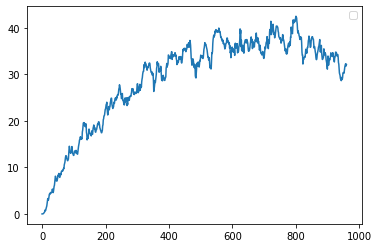

<ipython-input-47-81fea8941282>:62: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000002380AEBE550>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([line_mid], ['Flow'])


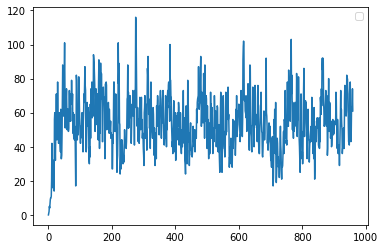

<ipython-input-47-81fea8941282>:65: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000002380AF19A30>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([line_down], ['Speed'])


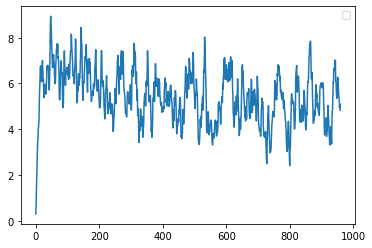

2021-05-17 21:39:23.136781


In [52]:
count = {
'RAMA4_FP1_END_MINGREEN': 0,
'RAMA4_FP1_END_MAXGREEN' : 0,
'RAMA4_FP1_END_FLOW' : 0,
'RAMA4_FP3_END_UNJAM': 0,
'RAMA4_FP3_END_OCC': 0,
'RAMA4_FP3_END_MINGREEN': 0,
'RAMA4_FP3_END_MAXGREEN': 0,
'RAMA4_FPX_TP1_UNJAM': 0,
'RAMA4_FPX_TP5_UNJAM': 0,
'RAMA4_FP2_END_MINGREEN': 0,
'RAMA4_FP2_END_MAXGREEN': 0,
'RAMA4_FP2_END_FLOW': 0,
'RAMA4_FPX_TP1_UNJAM': 0,
'RAMA4_FPX_TP5_UNJAM': 0,
'RAMA4_FP4_END_MAXGREEN': 0,
'RAMA4_FP4_END_MINGREEN' : 0,
'RAMA4_FP4_END_UNJAM': 0,
'RAMA4_FPX_TP1_UNJAM': 0,
'RAMA4_FP5_END_MINGREEN' : 0,
'RAMA4_FP5_END_MAXGREEN': 0,
'RAMA4_FP5_END_OCC': 0,

'KLONGTEI_FP3_END_FLOW': 0,
'KLONGTEI_NO_P3_MAXGREEN': 0,
'KLONGTEI_P3_MAXGREEN': 0,

'NARANONG_FP2_END_OCC' : 0,
'NARANONG_FP2_END_FLOW': 0,
'NARANONG_FP1_END_MINGREEN': 0,
'NARANONG_FPX_TP2_UNJAM': 0,
'NARANONG_FP1_END_MAXGREEN': 0,
'NARANONG_FP1_END_OCC': 0,
'NARANONG_FP2_END_MINGREEN': 0,
'NARANONG_FPX_TP1_UNJAM': 0,
'NARANONG_FP3_END_MINGREEN': 0,
'NARANONG_FP3_END_MAXGREEN':0,
'NARANONG_FPX_TP2_UNJAM': 0,
'NARANONG_FPX_TP1_UNJAM': 0,
'NARANONG_FP3_END_FLOW': 0,
'NARANONG_FP4_END_MAXGREEN': 0,
'NARANONG_FP4_END_MINGREEN': 0,
'NARANONG_FPX_TP1_UNJAM': 0,
'NARANONG_FP4_END_OCC': 0,
'NARANONG_FPX_TP2_UNJAM': 0,
'NARANONG_FPX_TP1_UNJAM': 0,
'NARANONG_FP5_END_OCC': 0,
'NARANONG_FP5_END_MINGREEN':0,
'NARANONG_FP5_END_MAXGREEN': 0,
'NARANONG_FPX_TP2_UNJAM': 0,
'NARANONG_FPX_TP1_UNJAM': 0,
'NARANONG_FP6_END_OCC': 0,
'NARANONG_FP6_END_MAXGREEN': 0,
'NARANONG_FP6_END_MINGREEN' : 0,

'SUNLAKAKHON_FP1_END_MAXGREEN': 0,
'SUNLAKAKHON_FP1_END_FLOW': 0,
'SUNLAKAKHON_FPX_TP1_UNJAM': 0,
'SUNLAKAKHON_FP1_END_MAXGREEN': 0,
'SUNLAKAKHON_FP2_END_FLOW': 0,
'SUNLAKAKHON_FPX_TP1_UNJAM': 0,
'SUNLAKAKHON_FP3_TP4_UNJAM': 0,
'SUNLAKAKHON_FP3_END_FLOW': 0,
'SUNLAKAKHON_FPX_TP1_UNJAM': 0,
'SUNLAKAKHON_FP4_END_MAXGREEN': 0,
'SUNLAKAKHON_FP4_END_FLOW': 0,
'SUNLAKAKHON_FP1_END_MINGREEN':0,
'SUNLAKAKHON_FP2_END_MINGREEN':0,
'SUNLAKAKHON_FP3_END_MINGREEN':0,
'SUNLAKAKHON_FP4_END_MINGREEN':0,

'KASEMRAT_FP3_END_MINGREEN':0,
'KASEMRAT_FP2_END_MINGREEN':0,
'KASEMRAT_FP1_END_MINGREEN':0,
'KASEMRAT_FP2_END_MAXGREEN':0,
'KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT': 0,
"KASEMRAT_FPX_TP2_UNJAM_EB_RAMA4":0,
'KASEMRAT_FPX_TP2_UNJAM_EB': 0,
'KASEMRAT_FP1_END_MAXGREEN': 0,
'KASEMRAT_FPX_TP3_UNJAM': 0,
'KASEMRAT_FP2_TP1_FLOW': 0,
'KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT': 0,
 'KASEMRAT_FPX_TP2_SUKHUMVIT': 0,
'KASEMRAT_FPX_TP2_UNJAM_EB': 0,
'KASEMRAT_FPX_TP2_UNJAM_ARI': 0,
'KASEMRAT_FP3_END_MAXGREEN': 0}
 
global count

duration={
    'RAMA4_FP1_END_MINGREEN' :30,
    'RAMA4_FP1_END_MAXGREEN' :120,
    'RAMA4_FP3_END_MINGREEN': 5,
    'RAMA4_FP3_END_MAXGREEN': 30,
    'RAMA4_FP2_END_MINGREEN': 30,
    'RAMA4_FP2_END_MAXGREEN' : 60,
    'RAMA4_FP4_END_MINGREEN' : 45,
    'RAMA4_FP4_END_MAXGREEN' : 90,
    'RAMA4_FP5_END_MINGREEN' : 30,
    'RAMA4_FP5_END_MAXGREEN' : 60,

    'KLONGTEI_NO_P3_MAXGREEN': 120,
    'KLONGTEI_P3_MAXGREEN': 30,

    'NARANONG_FP1_END_MAXGREEN': 120,
    'NARANONG_FP1_END_MINGREEN': 10,
    'NARANONG_FP2_END_MAXGREEN': 30,
    'NARANONG_FP2_END_MINGREEN': 15,
    'NARANONG_FP3_END_MAXGREEN': 180,
    'NARANONG_FP3_END_MINGREEN': 45,
    'NARANONG_FP4_END_MAXGREEN': 180, ##
    'NARANONG_FP4_END_MINGREEN':15,
    'NARANONG_FP5_END_MINGREEN':45,
    'NARANONG_FP5_END_MAXGREEN':120,
    'NARANONG_FP6_END_MAXGREEN': 45,
    'NARANONG_FP6_END_MINGREEN': 30,

    'SUNLAKAKHON_FP1_END_MAXGREEN': 180,
    'SUNLAKAKHON_FP2_END_MAXGREEN': 60,
    'SUNLAKAKHON_FP3_END_MAXGREEN': 60,
    'SUNLAKAKHON_FP4_END_MAXGREEN': 120,
    'SUNLAKAKHON_FP1_END_MINGREEN':30,
    'SUNLAKAKHON_FP2_END_MINGREEN':30,
    'SUNLAKAKHON_FP3_END_MINGREEN':30,
    'SUNLAKAKHON_FP4_END_MINGREEN':30,

    'KASEMRAT_FP3_END_MAXGREEN': 30,
    'KASEMRAT_FP3_END_MINGREEN':10,
    'KASEMRAT_FP2_END_MINGREEN':30,
    'KASEMRAT_FP1_END_MINGREEN':5,
    'KASEMRAT_FP1_END_MAXGREEN': 15,
    'KASEMRAT_FP2_END_MAXGREEN': 120
}
# duration={
#     'RAMA4_FP1_END_MINGREEN' :30,
#     'RAMA4_FP1_END_MAXGREEN' :120,
#     'RAMA4_FP3_END_MINGREEN': 5,
#     'RAMA4_FP3_END_MAXGREEN': 30,
#     'RAMA4_FP2_END_MINGREEN': 30,
#     'RAMA4_FP2_END_MAXGREEN' : 60,
#     'RAMA4_FP4_END_MINGREEN' : 45,
#     'RAMA4_FP4_END_MAXGREEN' : 90,
#     'RAMA4_FP5_END_MINGREEN' : 30,
#     'RAMA4_FP5_END_MAXGREEN' : 60,

#     'KLONGTEI_NO_P3_MAXGREEN': 120,
#     'KLONGTEI_P3_MAXGREEN': 30,

#     'NARANONG_FP1_END_MAXGREEN': 120,
#     'NARANONG_FP1_END_MINGREEN': 10,
#     'NARANONG_FP2_END_MAXGREEN': 30,
#     'NARANONG_FP2_END_MINGREEN': 15,
#     'NARANONG_FP3_END_MAXGREEN': 180,
#     'NARANONG_FP3_END_MINGREEN': 45,
#     'NARANONG_FP4_END_MAXGREEN': 180, ##
#     'NARANONG_FP4_END_MINGREEN':15,
#     'NARANONG_FP5_END_MINGREEN':45,
#     'NARANONG_FP5_END_MAXGREEN':120,
#     'NARANONG_FP6_END_MAXGREEN': 45,
#     'NARANONG_FP6_END_MINGREEN': 30,

#     'SUNLAKAKHON_FP1_END_MAXGREEN': 180,
#     'SUNLAKAKHON_FP2_END_MAXGREEN': 60,
#     'SUNLAKAKHON_FP3_END_MAXGREEN': 60,
#     'SUNLAKAKHON_FP4_END_MAXGREEN': 90,
#     'SUNLAKAKHON_FP1_END_MINGREEN':30,
#     'SUNLAKAKHON_FP2_END_MINGREEN':30,
#     'SUNLAKAKHON_FP3_END_MINGREEN':30,
#     'SUNLAKAKHON_FP4_END_MINGREEN':45,

#     'KASEMRAT_FP3_END_MAXGREEN': 30,
#     'KASEMRAT_FP3_END_MINGREEN':10,
#     'KASEMRAT_FP2_END_MINGREEN':30,
#     'KASEMRAT_FP1_END_MINGREEN':5,
#     'KASEMRAT_FP1_END_MAXGREEN': 15,
#     'KASEMRAT_FP2_END_MAXGREEN': 120
# }

threshold = { 
    "RAMA4_FP1_END_FLOW": 0.2, #0.25
    "RAMA4_FP3_END_UNJAM": 5, #
    "RAMA4_FP3_END_OCC": 40, #10
    "RAMA4_FPX_TP1_UNJAM": 270, #
    "RAMA4_FPX_TP5_UNJAM": 10,
    "RAMA4_FP2_END_FLOW": 0.25,
    "RAMA4_FP4_END_UNJAM": 461.1,
    "RAMA4_FP5_END_OCC": 5, #5
    "KLONGTEI_FP3_END_FLOW": 0.2 , #
    "NARANONG_FP1_TP2_UNJAM": 10,
    "NARANONG_FP1_END_OCC": 30,
    "NARANONG_FP2_END_OCC": 5, ##
    'NARANONG_FP2_END_FLOW': 0.25,
    "NARANONG_FP3_END_FLOW": 1,
    "NARANONG_FP4_END_OCC": 5, ##
    "NARANONG_FP5_END_OCC": 5, #2
    "NARANONG_FP6_END_OCC": 5, #10
    "NARANONG_FPX_TP2_UNJAM": 700,
    "NARANONG_FPX_TP1_UNJAM": 85,
    "SUNLAKAKHON_FP1_END_FLOW": 0,
    "SUNLAKAKHON_FPX_TP1_UNJAM": 400,
    "SUNLAKAKHON_FP2_END_FLOW": 0,
    "SUNLAKAKHON_FP3_TP4_UNJAM": 400,
    "SUNLAKAKHON_FP3_END_FLOW": 0,
    "SUNLAKAKHON_FP4_END_FLOW": 0,
    "KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT": 10,
    "KASEMRAT_FPX_TP2_UNJAM_EB": 100,
    "KASEMRAT_FPX_TP2_UNJAM_EB_RAMA4": 400,
    "KASEMRAT_FPX_TP2_UNJAM_ARI": 10,
    "KASEMRAT_FPX_TP3_UNJAM": 650,
    "KASEMRAT_FP2_TP1_FLOW": 0.25
}
from datetime import datetime
print(datetime.now())
rewards, throughputs, backlogs_avg,action = episode0(threshold, duration) #PEAM
print(datetime.now())

In [53]:
 count_s ={key:count[key] for key in sorted(count)}
    

In [54]:
count_s

{'KASEMRAT_FP1_END_MAXGREEN': 115,
 'KASEMRAT_FP1_END_MINGREEN': 116,
 'KASEMRAT_FP2_END_MAXGREEN': 0,
 'KASEMRAT_FP2_END_MINGREEN': 345,
 'KASEMRAT_FP2_TP1_FLOW': 30,
 'KASEMRAT_FP3_END_MAXGREEN': 85,
 'KASEMRAT_FP3_END_MINGREEN': 85,
 'KASEMRAT_FPX_TP2_SUKHUMVIT': 0,
 'KASEMRAT_FPX_TP2_UNJAM_ARI': 21,
 'KASEMRAT_FPX_TP2_UNJAM_EB': 0,
 'KASEMRAT_FPX_TP2_UNJAM_EB_RAMA4': 8,
 'KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT': 0,
 'KASEMRAT_FPX_TP3_UNJAM': 85,
 'KLONGTEI_FP3_END_FLOW': 94,
 'KLONGTEI_NO_P3_MAXGREEN': 94,
 'KLONGTEI_P3_MAXGREEN': 0,
 'NARANONG_FP1_END_MAXGREEN': 37,
 'NARANONG_FP1_END_MINGREEN': 48,
 'NARANONG_FP1_END_OCC': 20,
 'NARANONG_FP2_END_FLOW': 15,
 'NARANONG_FP2_END_MINGREEN': 11,
 'NARANONG_FP2_END_OCC': 5,
 'NARANONG_FP3_END_FLOW': 12,
 'NARANONG_FP3_END_MAXGREEN': 0,
 'NARANONG_FP3_END_MINGREEN': 60,
 'NARANONG_FP4_END_MAXGREEN': 10,
 'NARANONG_FP4_END_MINGREEN': 74,
 'NARANONG_FP4_END_OCC': 4,
 'NARANONG_FP5_END_MAXGREEN': 3,
 'NARANONG_FP5_END_MINGREEN': 56,
 'NARANONG_FP

In [55]:
df = pd.DataFrame.from_dict(count_s,orient='index')

In [56]:
df.to_csv('out.csv')

In [57]:
import pandas as pd
import pylatex as pl

pd.DataFrame.to_latex(df).replace('\n', ' ')

'\\begin{tabular}{lr} \\toprule {} &    0 \\\\ \\midrule KASEMRAT\\_FP1\\_END\\_MAXGREEN        &  115 \\\\ KASEMRAT\\_FP1\\_END\\_MINGREEN        &  116 \\\\ KASEMRAT\\_FP2\\_END\\_MAXGREEN        &    0 \\\\ KASEMRAT\\_FP2\\_END\\_MINGREEN        &  345 \\\\ KASEMRAT\\_FP2\\_TP1\\_FLOW            &   30 \\\\ KASEMRAT\\_FP3\\_END\\_MAXGREEN        &   85 \\\\ KASEMRAT\\_FP3\\_END\\_MINGREEN        &   85 \\\\ KASEMRAT\\_FPX\\_TP2\\_SUKHUMVIT       &    0 \\\\ KASEMRAT\\_FPX\\_TP2\\_UNJAM\\_ARI       &   21 \\\\ KASEMRAT\\_FPX\\_TP2\\_UNJAM\\_EB        &    0 \\\\ KASEMRAT\\_FPX\\_TP2\\_UNJAM\\_EB\\_RAMA4  &    8 \\\\ KASEMRAT\\_FPX\\_TP2\\_UNJAM\\_SUKHUMVIT &    0 \\\\ KASEMRAT\\_FPX\\_TP3\\_UNJAM           &   85 \\\\ KLONGTEI\\_FP3\\_END\\_FLOW            &   94 \\\\ KLONGTEI\\_NO\\_P3\\_MAXGREEN          &   94 \\\\ KLONGTEI\\_P3\\_MAXGREEN             &    0 \\\\ NARANONG\\_FP1\\_END\\_MAXGREEN        &   37 \\\\ NARANONG\\_FP1\\_END\\_MINGREEN        &   48 \\\\ NARANONG\\_FP1\\_

In [58]:
print(action)

[[3, 1, 1, 1, 1, 1], [3, 1, 2, 1, 2, 1], [3, 1, 3, 1, 2, 1], [3, 3, 3, 2, 2, 1], [3, 3, 3, 2, 2, 1], [3, 3, 3, 2, 1, 1], [1, 2, 3, 2, 1, 1], [1, 2, 4, 2, 2, 1], [2, 2, 4, 2, 2, 1], [1, 2, 4, 2, 2, 1], [1, 4, 5, 2, 2, 1], [1, 4, 5, 3, 1, 1], [1, 4, 5, 3, 1, 1], [1, 4, 5, 3, 2, 1], [1, 4, 5, 3, 2, 1], [1, 5, 6, 3, 2, 1], [1, 5, 6, 3, 2, 1], [1, 5, 6, 3, 1, 1], [2, 5, 6, 3, 1, 1], [1, 1, 1, 3, 2, 1], [3, 1, 1, 4, 2, 1], [3, 1, 1, 4, 2, 1], [3, 1, 1, 4, 2, 1], [3, 1, 1, 4, 1, 1], [3, 1, 1, 1, 1, 1], [3, 1, 2, 1, 2, 1], [3, 1, 3, 1, 2, 1], [3, 1, 3, 1, 2, 1], [2, 3, 3, 1, 2, 1], [1, 3, 3, 1, 2, 1], [1, 2, 3, 1, 1, 1], [1, 2, 4, 1, 1, 1], [1, 2, 4, 1, 2, 1], [1, 2, 4, 2, 2, 1], [1, 4, 5, 2, 2, 1], [1, 4, 5, 2, 2, 1], [1, 4, 5, 2, 1, 1], [1, 4, 5, 2, 1, 1], [2, 4, 5, 2, 2, 1], [1, 5, 6, 2, 2, 1], [1, 5, 6, 2, 2, 1], [1, 5, 6, 2, 2, 1], [1, 5, 6, 2, 3, 1], [1, 5, 1, 2, 3, 1], [3, 1, 1, 2, 3, 1], [3, 1, 1, 3, 1, 1], [3, 1, 1, 3, 1, 1], [3, 1, 1, 3, 2, 1], [2, 1, 1, 3, 2, 1], [2, 3, 1, 3, 2, 1],

In [59]:
throughputs

51832

In [60]:
backlogs_avg

733.6204861111111

In [61]:
# class KASEMRAT(gym.Env):
#     def __init__(self):
#         self.action_space = gym.spaces.Discrete(60)
#         self.observation_space = gym.spaces.Discrete(29)
#     def step(self, action):
#         action = get_action()
#         state = np.array(state)+np.array(action)
#         reward = episode0(state, duration)
#         done = True
#         return state, reward, done
#     def reset(self):
#             self.reward = 0
#             self.done = False
#             return state

In [62]:
# np.array([1,2])+np.array([1,2])

In [63]:
# {'RAMA4_FP1_END_MINGREEN': 854,
#  'RAMA4_FP1_END_MAXGREEN': 0,
#  'RAMA4_FP1_END_FLOW': 122,
#  'RAMA4_FP3_END_UNJAM': 18,
#  'RAMA4_FP3_END_OCC': 18,
#  'RAMA4_FP3_END_MINGREEN': 52,
#  'RAMA4_FP3_END_MAXGREEN': 1,
#  'RAMA4_FPX_TP1_UNJAM': 104,
#  'RAMA4_FPX_TP5_UNJAM': 3,
#  'RAMA4_FP2_END_MINGREEN': 503,
#  'RAMA4_FP2_END_MAXGREEN': 4,
#  'RAMA4_FP2_END_FLOW': 19,
#  'RAMA4_FP4_END_MAXGREEN': 6,
#  'RAMA4_FP4_END_MINGREEN': 680,
#  'RAMA4_FP4_END_UNJAM': 11,
#  'RAMA4_FP5_END_MINGREEN': 196,
#  'RAMA4_FP5_END_MAXGREEN': 15,
#  'RAMA4_FP5_END_OCC': 14,
#  'KLONGTEI_FP3_END_FLOW': 110,
#  'KLONGTEI_NO_P3_MAXGREEN': 110,
#  'KLONGTEI_P3_MAXGREEN': 0,
#  'NARANONG_FP2_END_OCC': 8,
#  'NARANONG_FP2_END_FLOW': 12,
#  'NARANONG_FP1_END_MINGREEN': 171,
#  'NARANONG_FPX_TP2_UNJAM': 2,
#  'NARANONG_FP1_END_MAXGREEN': 36,
#  'NARANONG_FP1_END_OCC': 22,
#  'NARANONG_FP2_END_MINGREEN': 23,
#  'NARANONG_FPX_TP1_UNJAM': 44,
#  'NARANONG_FP3_END_MINGREEN': 160,
#  'NARANONG_FP3_END_MAXGREEN': 0,
#  'NARANONG_FP3_END_FLOW': 15,
#  'NARANONG_FP4_END_MAXGREEN': 7,
#  'NARANONG_FP4_END_MINGREEN': 192,
#  'NARANONG_FP4_END_OCC': 8,
#  'NARANONG_FP5_END_OCC': 3,
#  'NARANONG_FP5_END_MINGREEN': 150,
#  'NARANONG_FP5_END_MAXGREEN': 4,
#  'NARANONG_FP6_END_OCC': 4,
#  'NARANONG_FP6_END_MAXGREEN': 8,
#  'NARANONG_FP6_END_MINGREEN': 105,
#  'SUNLAKAKHON_FP1_END_MAXGREEN': 0,
#  'SUNLAKAKHON_FP1_END_FLOW': 90,
#  'SUNLAKAKHON_FPX_TP1_UNJAM': 1,
#  'SUNLAKAKHON_FP2_END_FLOW': 89,
#  'SUNLAKAKHON_FP3_TP4_UNJAM': 0,
#  'SUNLAKAKHON_FP3_END_FLOW': 88,
#  'SUNLAKAKHON_FP4_END_MAXGREEN': 0,
#  'SUNLAKAKHON_FP4_END_FLOW': 88,
#  'SUNLAKAKHON_FP1_END_MINGREEN': 630,
#  'SUNLAKAKHON_FP2_END_MINGREEN': 623,
#  'SUNLAKAKHON_FP3_END_MINGREEN': 623,
#  'SUNLAKAKHON_FP4_END_MINGREEN': 617,
#  'KASEMRAT_FPX_TP2_UNJAM_ARI': 21,
#  'KASEMRAT_FP3_END_MINGREEN': 351,
#  'KASEMRAT_FP2_END_MINGREEN': 1043,
#  'KASEMRAT_FP1_END_MINGREEN': 428,
#  'KASEMRAT_FP2_END_MAXGREEN': 0,
#  'KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT': 0,
#  'KASEMRAT_FPX_TP2_UNJAM_EB_RAMA4': 8,
#  'KASEMRAT_FPX_TP2_UNJAM_EB': 1,
#  'KASEMRAT_FP1_END_MAXGREEN': 135,
#  'KASEMRAT_FPX_TP3_UNJAM': 117,
#  'KASEMRAT_FP2_TP1_FLOW': 97,
#  'KASEMRAT_FPX_TP2_SUKHUMVIT': 0,
#  'KASEMRAT_FP3_END_MAXGREEN': 116}

In [64]:
count

{'RAMA4_FP1_END_MINGREEN': 240,
 'RAMA4_FP1_END_MAXGREEN': 1,
 'RAMA4_FP1_END_FLOW': 77,
 'RAMA4_FP3_END_UNJAM': 9,
 'RAMA4_FP3_END_OCC': 9,
 'RAMA4_FP3_END_MINGREEN': 21,
 'RAMA4_FP3_END_MAXGREEN': 1,
 'RAMA4_FPX_TP1_UNJAM': 69,
 'RAMA4_FPX_TP5_UNJAM': 7,
 'RAMA4_FP2_END_MINGREEN': 129,
 'RAMA4_FP2_END_MAXGREEN': 7,
 'RAMA4_FP2_END_FLOW': 11,
 'RAMA4_FP4_END_MAXGREEN': 4,
 'RAMA4_FP4_END_MINGREEN': 192,
 'RAMA4_FP4_END_UNJAM': 7,
 'RAMA4_FP5_END_MINGREEN': 75,
 'RAMA4_FP5_END_MAXGREEN': 21,
 'RAMA4_FP5_END_OCC': 9,
 'KLONGTEI_FP3_END_FLOW': 94,
 'KLONGTEI_NO_P3_MAXGREEN': 94,
 'KLONGTEI_P3_MAXGREEN': 0,
 'NARANONG_FP2_END_OCC': 5,
 'NARANONG_FP2_END_FLOW': 15,
 'NARANONG_FP1_END_MINGREEN': 48,
 'NARANONG_FPX_TP2_UNJAM': 6,
 'NARANONG_FP1_END_MAXGREEN': 37,
 'NARANONG_FP1_END_OCC': 20,
 'NARANONG_FP2_END_MINGREEN': 11,
 'NARANONG_FPX_TP1_UNJAM': 37,
 'NARANONG_FP3_END_MINGREEN': 60,
 'NARANONG_FP3_END_MAXGREEN': 0,
 'NARANONG_FP3_END_FLOW': 12,
 'NARANONG_FP4_END_MAXGREEN': 10,
 'NARAN

In [65]:
# meanWaitingTime_avg,meanTravelTime_avg,meanSpeed_avg = read_summary_xml()

In [66]:
print(rewards, throughputs, backlogs_avg)

43380.69200000006 51832 733.6204861111111


In [67]:
print(meanWaitingTime_avg,meanTravelTime_avg,meanSpeed_avg)

NameError: name 'meanWaitingTime_avg' is not defined

In [ ]:
len(['{0: 2, 1: 7, 2: 1, 3: 8, 4: 6, 5: 7}', '{0: 0, 1: 8, 2: 4, 3: 3, 4: 2, 5: 7}', '{0: 4, 1: 8, 2: 1, 3: 3, 4: 0, 5: 0}', '{0: 2, 1: 7, 2: 1, 3: 4, 4: 0, 5: 1}', '{0: 7, 1: 4, 2: 1, 3: 3, 4: 0, 5: 4}', '{0: 0, 1: 8, 2: 7, 3: 8, 4: 0, 5: 0}', '{0: 2, 1: 7, 2: 1, 3: 4, 4: 0, 5: 7}', '{0: 0, 1: 3, 2: 5, 3: 7, 4: 1, 5: 3}', '{0: 1, 1: 8, 2: 3, 3: 8, 4: 0, 5: 8}', '{0: 2, 1: 8, 2: 1, 3: 6, 4: 0, 5: 0}', '{0: 2, 1: 8, 2: 1, 3: 7, 4: 0, 5: 0}', '{0: 2, 1: 8, 2: 1, 3: 7, 4: 0, 5: 3}', '{0: 2, 1: 8, 2: 1, 3: 7, 4: 0, 5: 5}', '{0: 2, 1: 8, 2: 1, 3: 7, 4: 0, 5: 0}', '{0: 2, 1: 4, 2: 7, 3: 7, 4: 0, 5: 0}', '{0: 7, 1: 2, 2: 4, 3: 0, 4: 0, 5: 0}', '{0: 0, 1: 8, 2: 1, 3: 4, 4: 5, 5: 0}', '{0: 3, 1: 7, 2: 0, 3: 7, 4: 0, 5: 1}', '{0: 4, 1: 8, 2: 1, 3: 8, 4: 0, 5: 4}', '{0: 4, 1: 8, 2: 1, 3: 4, 4: 0, 5: 4}', '{0: 3, 1: 1, 2: 7, 3: 8, 4: 0, 5: 2}', '{0: 3, 1: 5, 2: 3, 3: 7, 4: 0, 5: 1}', '{0: 4, 1: 8, 2: 3, 3: 8, 4: 0, 5: 0}', '{0: 3, 1: 8, 2: 3, 3: 8, 4: 0, 5: 0}', '{0: 4, 1: 6, 2: 3, 3: 8, 4: 0, 5: 3}', '{0: 4, 1: 0, 2: 0, 3: 8, 4: 8, 5: 1}', '{0: 4, 1: 4, 2: 1, 3: 8, 4: 0, 5: 7}', '{0: 4, 1: 8, 2: 1, 3: 8, 4: 0, 5: 0}', '{0: 4, 1: 8, 2: 1, 3: 3, 4: 0, 5: 0}', '{0: 4, 1: 3, 2: 7, 3: 4, 4: 0, 5: 1}', '{0: 4, 1: 8, 2: 1, 3: 8, 4: 0, 5: 8}', '{0: 4, 1: 2, 2: 1, 3: 8, 4: 0, 5: 0}', '{0: 4, 1: 6, 2: 1, 3: 4, 4: 0, 5: 4}', '{0: 4, 1: 3, 2: 1, 3: 4, 4: 0, 5: 1}', '{0: 4, 1: 8, 2: 1, 3: 8, 4: 0, 5: 8}', '{0: 4, 1: 4, 2: 1, 3: 8, 4: 0, 5: 0}', '{0: 4, 1: 6, 2: 1, 3: 5, 4: 0, 5: 0}', '{0: 4, 1: 3, 2: 4, 3: 4, 4: 0, 5: 1}', '{0: 7, 1: 8, 2: 1, 3: 8, 4: 4, 5: 0}', '{0: 4, 1: 4, 2: 1, 3: 7, 4: 0, 5: 0}', '{0: 4, 1: 2, 2: 1, 3: 4, 4: 0, 5: 1}', '{0: 1, 1: 8, 2: 6, 3: 5, 4: 0, 5: 0}', '{0: 4, 1: 5, 2: 1, 3: 0, 4: 0, 5: 1}', '{0: 4, 1: 0, 2: 1, 3: 0, 4: 0, 5: 0}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 0, 5: 6}', '{0: 3, 1: 4, 2: 1, 3: 6, 4: 0, 5: 0}', '{0: 4, 1: 8, 2: 1, 3: 5, 4: 0, 5: 0}', '{0: 4, 1: 8, 2: 1, 3: 5, 4: 0, 5: 0}', '{0: 4, 1: 5, 2: 0, 3: 8, 4: 0, 5: 0}', '{0: 4, 1: 4, 2: 4, 3: 5, 4: 0, 5: 1}', '{0: 4, 1: 8, 2: 7, 3: 5, 4: 0, 5: 0}', '{0: 4, 1: 8, 2: 4, 3: 5, 4: 0, 5: 6}', '{0: 4, 1: 8, 2: 1, 3: 5, 4: 0, 5: 0}', '{0: 4, 1: 8, 2: 1, 3: 5, 4: 0, 5: 0}', '{0: 4, 1: 8, 2: 2, 3: 5, 4: 0, 5: 0}', '{0: 4, 1: 8, 2: 1, 3: 5, 4: 0, 5: 0}', '{0: 5, 1: 8, 2: 4, 3: 5, 4: 7, 5: 0}', '{0: 4, 1: 8, 2: 4, 3: 5, 4: 0, 5: 1}', '{0: 6, 1: 8, 2: 7, 3: 5, 4: 0, 5: 4}', '{0: 4, 1: 8, 2: 4, 3: 5, 4: 0, 5: 0}', '{0: 4, 1: 1, 2: 4, 3: 5, 4: 0, 5: 6}', '{0: 4, 1: 5, 2: 4, 3: 5, 4: 0, 5: 1}', '{0: 4, 1: 0, 2: 7, 3: 1, 4: 0, 5: 4}', '{0: 2, 1: 4, 2: 1, 3: 8, 4: 4, 5: 4}', '{0: 0, 1: 7, 2: 1, 3: 8, 4: 0, 5: 7}', '{0: 3, 1: 0, 2: 1, 3: 5, 4: 2, 5: 2}', '{0: 7, 1: 4, 2: 2, 3: 8, 4: 0, 5: 0}', '{0: 4, 1: 5, 2: 1, 3: 8, 4: 8, 5: 0}', '{0: 4, 1: 0, 2: 1, 3: 8, 4: 4, 5: 8}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 4, 5: 0}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 4, 5: 1}', '{0: 7, 1: 8, 2: 1, 3: 8, 4: 4, 5: 0}', '{0: 4, 1: 8, 2: 1, 3: 7, 4: 0, 5: 0}', '{0: 1, 1: 8, 2: 1, 3: 7, 4: 0, 5: 0}', '{0: 3, 1: 7, 2: 1, 3: 3, 4: 0, 5: 0}', '{0: 5, 1: 1, 2: 3, 3: 5, 4: 0, 5: 1}', '{0: 4, 1: 5, 2: 4, 3: 5, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 4, 5: 0}', '{0: 4, 1: 8, 2: 1, 3: 4, 4: 0, 5: 7}', '{0: 4, 1: 8, 2: 1, 3: 7, 4: 3, 5: 1}', '{0: 4, 1: 8, 2: 8, 3: 5, 4: 6, 5: 0}', '{0: 4, 1: 8, 2: 2, 3: 5, 4: 8, 5: 7}', '{0: 4, 1: 8, 2: 3, 3: 5, 4: 6, 5: 6}', '{0: 4, 1: 8, 2: 3, 3: 5, 4: 2, 5: 8}', '{0: 4, 1: 0, 2: 3, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 8, 2: 2, 3: 5, 4: 4, 5: 7}', '{0: 0, 1: 8, 2: 1, 3: 5, 4: 2, 5: 7}', '{0: 3, 1: 7, 2: 1, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 3, 2: 1, 3: 0, 4: 4, 5: 0}', '{0: 4, 1: 8, 2: 4, 3: 5, 4: 4, 5: 5}', '{0: 4, 1: 4, 2: 4, 3: 5, 4: 4, 5: 0}', '{0: 4, 1: 8, 2: 4, 3: 5, 4: 7, 5: 1}', '{0: 4, 1: 8, 2: 7, 3: 5, 4: 0, 5: 0}', '{0: 5, 1: 8, 2: 1, 3: 5, 4: 0, 5: 6}', '{0: 4, 1: 8, 2: 1, 3: 5, 4: 0, 5: 1}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 0, 5: 0}', '{0: 8, 1: 8, 2: 4, 3: 2, 4: 6, 5: 6}', '{0: 4, 1: 5, 2: 1, 3: 5, 4: 0, 5: 6}', '{0: 4, 1: 4, 2: 1, 3: 0, 4: 0, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 0, 5: 6}', '{0: 4, 1: 1, 2: 1, 3: 5, 4: 0, 5: 6}', '{0: 4, 1: 5, 2: 7, 3: 5, 4: 0, 5: 1}', '{0: 4, 1: 4, 2: 7, 3: 5, 4: 0, 5: 0}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 0, 2: 1, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 0, 5: 1}', '{0: 4, 1: 8, 2: 5, 3: 5, 4: 2, 5: 4}', '{0: 4, 1: 8, 2: 4, 3: 5, 4: 0, 5: 0}', '{0: 6, 1: 8, 2: 6, 3: 6, 4: 0, 5: 7}', '{0: 4, 1: 2, 2: 7, 3: 5, 4: 5, 5: 7}', '{0: 4, 1: 8, 2: 7, 3: 5, 4: 4, 5: 7}', '{0: 2, 1: 4, 2: 2, 3: 5, 4: 4, 5: 1}', '{0: 1, 1: 4, 2: 1, 3: 5, 4: 0, 5: 0}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 0, 5: 7}', '{0: 2, 1: 4, 2: 1, 3: 5, 4: 0, 5: 2}', '{0: 1, 1: 4, 2: 2, 3: 5, 4: 0, 5: 0}', '{0: 4, 1: 3, 2: 1, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 8, 2: 1, 3: 7, 4: 0, 5: 0}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 4, 5: 7}', '{0: 4, 1: 8, 2: 1, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 8, 5: 7}', '{0: 4, 1: 4, 2: 4, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 8, 2: 0, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 8, 2: 1, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 0, 5: 3}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 8, 2: 1, 3: 5, 4: 0, 5: 7}', '{0: 5, 1: 4, 2: 1, 3: 3, 4: 0, 5: 7}', '{0: 5, 1: 4, 2: 1, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 1, 2: 3, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 5, 2: 6, 3: 5, 4: 5, 5: 7}', '{0: 4, 1: 0, 2: 7, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 4, 2: 7, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 7, 3: 0, 4: 0, 5: 7}', '{0: 3, 1: 8, 2: 2, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 7, 5: 7}', '{0: 4, 1: 4, 2: 5, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 8, 2: 4, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 8, 2: 1, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 8, 2: 2, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 1, 2: 1, 3: 5, 4: 5, 5: 7}', '{0: 4, 1: 5, 2: 1, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 8, 2: 4, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 8, 2: 1, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 8, 2: 4, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 8, 2: 4, 3: 3, 4: 0, 5: 7}', '{0: 4, 1: 1, 2: 1, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 5, 2: 3, 3: 4, 4: 0, 5: 7}', '{0: 4, 1: 0, 2: 3, 3: 8, 4: 0, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 2, 4: 0, 5: 7}', '{0: 4, 1: 8, 2: 3, 3: 0, 4: 5, 5: 7}', '{0: 4, 1: 8, 2: 3, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 2, 2: 3, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 0, 2: 3, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 8, 4: 0, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 2, 5: 7}', '{0: 4, 1: 4, 2: 7, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 2, 2: 3, 3: 5, 4: 8, 5: 7}', '{0: 4, 1: 7, 2: 3, 3: 5, 4: 0, 5: 7}', '{0: 5, 1: 4, 2: 3, 3: 5, 4: 0, 5: 8}', '{0: 7, 1: 4, 2: 3, 3: 5, 4: 0, 5: 8}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 0, 5: 8}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 0, 5: 8}', '{0: 4, 1: 8, 2: 3, 3: 5, 4: 0, 5: 8}', '{0: 6, 1: 8, 2: 3, 3: 5, 4: 0, 5: 1}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 4, 5: 5}', '{0: 4, 1: 8, 2: 3, 3: 5, 4: 0, 5: 4}', '{0: 4, 1: 8, 2: 3, 3: 0, 4: 1, 5: 4}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 4}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 6, 2: 3, 3: 5, 4: 5, 5: 7}', '{0: 4, 1: 8, 2: 3, 3: 5, 4: 6, 5: 8}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 8, 2: 3, 3: 5, 4: 7, 5: 7}', '{0: 4, 1: 8, 2: 3, 3: 5, 4: 6, 5: 2}', '{0: 4, 1: 8, 2: 2, 3: 5, 4: 6, 5: 8}', '{0: 4, 1: 8, 2: 1, 3: 5, 4: 6, 5: 4}', '{0: 4, 1: 4, 2: 2, 3: 5, 4: 6, 5: 4}', '{0: 0, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 0, 3: 5, 4: 6, 5: 8}', '{0: 3, 1: 4, 2: 1, 3: 5, 4: 6, 5: 1}', '{0: 4, 1: 4, 2: 2, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 6, 4: 6, 5: 0}', '{0: 0, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 3, 1: 8, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 2, 3: 5, 4: 6, 5: 3}', '{0: 4, 1: 4, 2: 1, 3: 6, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 2, 3: 5, 4: 6, 5: 0}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 7, 5: 1}', '{0: 5, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 7, 1: 4, 2: 1, 3: 1, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 0, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 2, 3: 5, 4: 6, 5: 7}', '{0: 8, 1: 4, 2: 1, 3: 5, 4: 6, 5: 6}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 6, 1: 4, 2: 1, 3: 5, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 4, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 7, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 7, 3: 5, 4: 6, 5: 7}', '{0: 7, 1: 1, 2: 7, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 1, 4: 2, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 1, 4: 0, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 0, 4: 4, 5: 7}', '{0: 7, 1: 4, 2: 1, 3: 5, 4: 7, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 4, 5: 7}', '{0: 6, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 6, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 4, 3: 1, 4: 6, 5: 5}', '{0: 4, 1: 4, 2: 1, 3: 0, 4: 6, 5: 3}', '{0: 4, 1: 4, 2: 1, 3: 0, 4: 6, 5: 7}', '{0: 1, 1: 4, 2: 4, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 7, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 0, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 7, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 5, 3: 5, 4: 6, 5: 7}', '{0: 5, 1: 4, 2: 4, 3: 5, 4: 6, 5: 7}', '{0: 7, 1: 4, 2: 7, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 7, 3: 5, 4: 2, 5: 7}', '{0: 4, 1: 4, 2: 7, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 4, 2: 7, 3: 5, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 7, 3: 5, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 7, 3: 1, 4: 5, 5: 7}', '{0: 4, 1: 5, 2: 1, 3: 0, 4: 2, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 0, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 4, 5: 7}', '{0: 4, 1: 6, 2: 3, 3: 5, 4: 3, 5: 7}', '{0: 4, 1: 8, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 7, 4: 6, 5: 7}', '{0: 4, 1: 5, 2: 3, 3: 5, 4: 7, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 0, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 2, 1: 3, 2: 7, 3: 5, 4: 6, 5: 7}', '{0: 1, 1: 8, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 3}', '{0: 4, 1: 8, 2: 3, 3: 3, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 5, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 4, 3: 2, 4: 0, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 0, 4: 2, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 0, 4: 0, 5: 3}', '{0: 4, 1: 4, 2: 2, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 1, 5: 7}', '{0: 1, 1: 4, 2: 1, 3: 0, 4: 6, 5: 4}', '{0: 4, 1: 4, 2: 2, 3: 0, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 7, 2: 2, 3: 0, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 3, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 8, 4: 5, 5: 7}', '{0: 6, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 7, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 7, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 7, 2: 3, 3: 5, 4: 7, 5: 7}', '{0: 4, 1: 7, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 7, 2: 8, 3: 5, 4: 6, 5: 1}', '{0: 0, 1: 6, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 3, 1: 6, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 2, 2: 1, 3: 4, 4: 6, 5: 1}', '{0: 4, 1: 8, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 8, 2: 2, 3: 4, 4: 6, 5: 7}', '{0: 3, 1: 8, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 3, 1: 0, 2: 1, 3: 4, 4: 6, 5: 5}', '{0: 4, 1: 8, 2: 3, 3: 0, 4: 6, 5: 7}', '{0: 3, 1: 8, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 3, 1: 8, 2: 3, 3: 0, 4: 6, 5: 7}', '{0: 3, 1: 8, 2: 3, 3: 5, 4: 6, 5: 0}', '{0: 3, 1: 8, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 3, 1: 8, 2: 0, 3: 5, 4: 6, 5: 7}', '{0: 3, 1: 8, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 3, 3: 5, 4: 3, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 1, 4: 6, 5: 3}', '{0: 5, 1: 2, 2: 3, 3: 0, 4: 6, 5: 7}', '{0: 1, 1: 7, 2: 0, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 0, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 3, 1: 5, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 2, 2: 4, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 8, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 3, 4: 6, 5: 3}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 7, 2: 3, 3: 4, 4: 0, 5: 7}', '{0: 4, 1: 0, 2: 2, 3: 6, 4: 6, 5: 7}', '{0: 4, 1: 8, 2: 4, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 8, 2: 1, 3: 4, 4: 4, 5: 2}', '{0: 3, 1: 3, 2: 1, 3: 4, 4: 6, 5: 3}', '{0: 4, 1: 8, 2: 1, 3: 7, 4: 4, 5: 0}', '{0: 3, 1: 1, 2: 1, 3: 4, 4: 8, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 4, 4: 4, 5: 4}', '{0: 2, 1: 4, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 1, 1: 4, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 4, 4: 1, 5: 7}', '{0: 7, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 6, 1: 3, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 3, 1: 8, 2: 1, 3: 4, 4: 0, 5: 7}', '{0: 3, 1: 4, 2: 6, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 7, 2: 4, 3: 4, 4: 6, 5: 7}', '{0: 3, 1: 8, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 3, 1: 8, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 2, 1: 8, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 1, 1: 8, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 5, 1: 0, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 6, 2: 3, 3: 4, 4: 4, 5: 7}', '{0: 8, 1: 8, 2: 3, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 8, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 1, 2: 3, 3: 4, 4: 6, 5: 6}', '{0: 4, 1: 4, 2: 2, 3: 4, 4: 7, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 1}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 0, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 8}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 8, 5: 7}', '{0: 4, 1: 4, 2: 7, 3: 4, 4: 6, 5: 6}', '{0: 4, 1: 4, 2: 7, 3: 4, 4: 6, 5: 1}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 1, 5: 1}', '{0: 0, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 1, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 0, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 7, 3: 5, 4: 4, 5: 7}', '{0: 7, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 0, 1: 4, 2: 3, 3: 5, 4: 2, 5: 5}', '{0: 3, 1: 4, 2: 3, 3: 5, 4: 0, 5: 7}', '{0: 7, 1: 4, 2: 8, 3: 5, 4: 8, 5: 7}', '{0: 3, 1: 4, 2: 3, 3: 5, 4: 4, 5: 6}', '{0: 3, 1: 4, 2: 3, 3: 5, 4: 4, 5: 7}', '{0: 3, 1: 4, 2: 3, 3: 5, 4: 1, 5: 7}', '{0: 3, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 3, 3: 2, 4: 6, 5: 1}', '{0: 3, 1: 4, 2: 3, 3: 3, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 3, 3: 2, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 3, 3: 5, 4: 2, 5: 7}', '{0: 3, 1: 4, 2: 6, 3: 0, 4: 0, 5: 7}', '{0: 3, 1: 4, 2: 7, 3: 5, 4: 4, 5: 7}', '{0: 3, 1: 4, 2: 7, 3: 5, 4: 4, 5: 7}', '{0: 3, 1: 7, 2: 7, 3: 5, 4: 4, 5: 7}', '{0: 3, 1: 0, 2: 1, 3: 5, 4: 4, 5: 7}', '{0: 3, 1: 8, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 3, 1: 8, 2: 1, 3: 5, 4: 4, 5: 7}', '{0: 3, 1: 8, 2: 1, 3: 5, 4: 4, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 5, 4: 4, 5: 2}', '{0: 7, 1: 4, 2: 5, 3: 5, 4: 4, 5: 0}', '{0: 3, 1: 4, 2: 4, 3: 5, 4: 4, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 5, 4: 4, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 5, 4: 4, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 5, 4: 4, 5: 7}', '{0: 6, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 3, 1: 7, 2: 3, 3: 5, 4: 4, 5: 7}', '{0: 3, 1: 4, 2: 3, 3: 5, 4: 4, 5: 7}', '{0: 6, 1: 4, 2: 3, 3: 5, 4: 3, 5: 7}', '{0: 4, 1: 5, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 3, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 8, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 3, 1: 1, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 0, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 1, 1: 4, 2: 3, 3: 4, 4: 6, 5: 8}', '{0: 0, 1: 4, 2: 0, 3: 4, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 6, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 7, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 4, 4: 6, 5: 5}', '{0: 3, 1: 4, 2: 1, 3: 3, 4: 0, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 3, 1: 4, 2: 3, 3: 4, 4: 4, 5: 7}', '{0: 7, 1: 4, 2: 3, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 8, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 1, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 8, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 3, 1: 8, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 3, 1: 8, 2: 3, 3: 0, 4: 6, 5: 7}', '{0: 7, 1: 2, 2: 3, 3: 6, 4: 6, 5: 2}', '{0: 3, 1: 4, 2: 3, 3: 5, 4: 6, 5: 8}', '{0: 7, 1: 4, 2: 3, 3: 5, 4: 6, 5: 8}', '{0: 3, 1: 7, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 3, 1: 6, 2: 3, 3: 5, 4: 6, 5: 4}', '{0: 3, 1: 2, 2: 3, 3: 5, 4: 6, 5: 4}', '{0: 3, 1: 8, 2: 3, 3: 5, 4: 6, 5: 4}', '{0: 3, 1: 8, 2: 3, 3: 5, 4: 6, 5: 8}', '{0: 3, 1: 8, 2: 1, 3: 7, 4: 6, 5: 0}', '{0: 4, 1: 4, 2: 2, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 6, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 7, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 6, 1: 4, 2: 1, 3: 5, 4: 6, 5: 2}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 4}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 4}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 4}', '{0: 4, 1: 4, 2: 7, 3: 8, 4: 6, 5: 8}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 4, 5: 3}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 3, 5: 4}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 8}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 0}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 2, 5: 6}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 0, 5: 5}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 4, 5: 3}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 4, 5: 7}', '{0: 8, 1: 4, 2: 3, 3: 5, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 6, 3: 5, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 7, 3: 5, 4: 0, 5: 8}', '{0: 4, 1: 4, 2: 7, 3: 5, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 7, 3: 5, 4: 4, 5: 7}', '{0: 4, 1: 6, 2: 3, 3: 5, 4: 4, 5: 7}', '{0: 4, 1: 8, 2: 3, 3: 5, 4: 4, 5: 7}', '{0: 4, 1: 8, 2: 3, 3: 5, 4: 3, 5: 7}', '{0: 4, 1: 7, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 6, 2: 0, 3: 3, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 2, 2: 1, 3: 4, 4: 1, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 4, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 0, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 0, 1: 4, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 3, 1: 4, 2: 0, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 5, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 4, 3: 4, 4: 4, 5: 7}', '{0: 1, 1: 4, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 4, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 8, 5: 7}', '{0: 4, 1: 4, 2: 4, 3: 4, 4: 4, 5: 3}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 5, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 7, 4: 4, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 6, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 3, 2: 4, 3: 7, 4: 4, 5: 7}', '{0: 4, 1: 8, 2: 1, 3: 2, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 8, 5: 4}', '{0: 4, 1: 4, 2: 3, 3: 2, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 4, 5: 7}', '{0: 3, 1: 4, 2: 0, 3: 5, 4: 4, 5: 7}', '{0: 0, 1: 4, 2: 1, 3: 5, 4: 4, 5: 7}', '{0: 6, 1: 4, 2: 8, 3: 5, 4: 4, 5: 7}', '{0: 6, 1: 0, 2: 3, 3: 5, 4: 4, 5: 7}', '{0: 6, 1: 8, 2: 7, 3: 6, 4: 4, 5: 7}', '{0: 6, 1: 0, 2: 7, 3: 5, 4: 4, 5: 7}', '{0: 6, 1: 2, 2: 5, 3: 5, 4: 2, 5: 7}', '{0: 3, 1: 2, 2: 4, 3: 5, 4: 3, 5: 0}', '{0: 6, 1: 4, 2: 1, 3: 5, 4: 0, 5: 5}', '{0: 4, 1: 4, 2: 3, 3: 0, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 8, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 4, 5: 5}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 0, 3: 4, 4: 4, 5: 0}', '{0: 7, 1: 4, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 5, 2: 1, 3: 4, 4: 2, 5: 1}', '{0: 4, 1: 4, 2: 4, 3: 8, 4: 3, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 5, 5: 7}', '{0: 4, 1: 4, 2: 2, 3: 4, 4: 3, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 0}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 6, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 0, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 8, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 1, 1: 8, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 1, 1: 8, 2: 1, 3: 4, 4: 6, 5: 3}', '{0: 4, 1: 7, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 6, 1: 7, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 7, 2: 2, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 7, 3: 4, 4: 3, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 2, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 1, 1: 4, 2: 3, 3: 4, 4: 6, 5: 5}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 1, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 4}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 1, 5: 8}', '{0: 4, 1: 4, 2: 4, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 0}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 7, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 6}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 5, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 1, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 4, 3: 0, 4: 8, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 0, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 4, 3: 5, 4: 6, 5: 6}', '{0: 7, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 5, 2: 1, 3: 0, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 8, 4: 6, 5: 8}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 5, 3: 5, 4: 6, 5: 5}', '{0: 4, 1: 4, 2: 4, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 8, 5: 7}', '{0: 4, 1: 4, 2: 2, 3: 0, 4: 6, 5: 5}', '{0: 4, 1: 4, 2: 7, 3: 5, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 1, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 4, 3: 7, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 0, 4: 6, 5: 7}', '{0: 7, 1: 4, 2: 1, 3: 3, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 1, 2: 2, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 6, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 5}', '{0: 4, 1: 4, 2: 5, 3: 2, 4: 6, 5: 6}', '{0: 0, 1: 7, 2: 4, 3: 5, 4: 6, 5: 6}', '{0: 3, 1: 7, 2: 1, 3: 5, 4: 6, 5: 2}', '{0: 3, 1: 0, 2: 1, 3: 5, 4: 5, 5: 4}', '{0: 8, 1: 2, 2: 1, 3: 5, 4: 6, 5: 8}', '{0: 3, 1: 4, 2: 1, 3: 5, 4: 6, 5: 4}', '{0: 3, 1: 4, 2: 6, 3: 5, 4: 6, 5: 8}', '{0: 3, 1: 4, 2: 1, 3: 4, 4: 6, 5: 8}', '{0: 6, 1: 4, 2: 3, 3: 4, 4: 6, 5: 0}', '{0: 3, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 6, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 7, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 0, 1: 4, 2: 1, 3: 3, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 6, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 7, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 8, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 8, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 8, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 3, 1: 8, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 3, 1: 8, 2: 1, 3: 4, 4: 2, 5: 7}', '{0: 3, 1: 8, 2: 3, 3: 0, 4: 3, 5: 7}', '{0: 3, 1: 4, 2: 4, 3: 2, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 2, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 7, 4: 2, 5: 7}', '{0: 3, 1: 4, 2: 3, 3: 5, 4: 3, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 7, 1: 5, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 7, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 3}', '{0: 4, 1: 3, 2: 1, 3: 5, 4: 6, 5: 2}', '{0: 4, 1: 8, 2: 1, 3: 5, 4: 6, 5: 0}', '{0: 6, 1: 4, 2: 2, 3: 5, 4: 6, 5: 7}', '{0: 6, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 7, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 3, 1: 0, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 3, 1: 8, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 1, 1: 8, 2: 8, 3: 4, 4: 6, 5: 7}', '{0: 3, 1: 8, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 3, 1: 8, 2: 1, 3: 4, 4: 7, 5: 7}', '{0: 3, 1: 8, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 3, 1: 8, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 3, 1: 0, 2: 3, 3: 4, 4: 6, 5: 6}', '{0: 3, 1: 8, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 3, 1: 8, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 3, 1: 8, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 3, 1: 8, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 8, 2: 1, 3: 4, 4: 0, 5: 7}', '{0: 5, 1: 8, 2: 4, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 8, 2: 5, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 8, 2: 4, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 8, 2: 7, 3: 4, 4: 4, 5: 5}', '{0: 5, 1: 8, 2: 8, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 8, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 8, 2: 4, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 8, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 8, 2: 4, 3: 4, 4: 4, 5: 7}', '{0: 1, 1: 1, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 8, 1: 4, 2: 4, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 4, 5: 0}', '{0: 4, 1: 4, 2: 4, 3: 4, 4: 4, 5: 8}', '{0: 3, 1: 4, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 7, 3: 1, 4: 3, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 0, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 7, 3: 5, 4: 6, 5: 0}', '{0: 3, 1: 7, 2: 1, 3: 1, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 2, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 8}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 2, 1: 4, 2: 1, 3: 5, 4: 8, 5: 7}', '{0: 1, 1: 4, 2: 1, 3: 7, 4: 6, 5: 7}', '{0: 5, 1: 4, 2: 4, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 3, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 8, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 1, 1: 4, 2: 1, 3: 5, 4: 6, 5: 0}', '{0: 2, 1: 2, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 1, 1: 8, 2: 1, 3: 5, 4: 6, 5: 2}', '{0: 4, 1: 7, 2: 3, 3: 5, 4: 6, 5: 4}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 4}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 6}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 0}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 8, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 2, 4: 5, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 5, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 6, 4: 5, 5: 7}', '{0: 6, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 7, 1: 6, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 1, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 3, 2: 1, 3: 8, 4: 6, 5: 7}', '{0: 4, 1: 8, 2: 6, 3: 5, 4: 7, 5: 4}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 7, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 3, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 2, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 8, 1: 4, 2: 1, 3: 5, 4: 2, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 3, 5: 3}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 1, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 3, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 3}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 6, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 6}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 6, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 6, 3: 4, 4: 6, 5: 7}', '{0: 5, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 3}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 8, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 1, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 6, 1: 1, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 4, 4: 0, 5: 7}', '{0: 3, 1: 5, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 3, 1: 7, 2: 6, 3: 4, 4: 7, 5: 2}', '{0: 3, 1: 4, 2: 1, 3: 4, 4: 4, 5: 0}', '{0: 3, 1: 4, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 0, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 1, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 6, 1: 4, 2: 1, 3: 4, 4: 0, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 8, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 8, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 0, 5: 1}', '{0: 4, 1: 7, 2: 1, 3: 7, 4: 4, 5: 7}', '{0: 4, 1: 3, 2: 3, 3: 4, 4: 4, 5: 7}', '{0: 4, 1: 8, 2: 1, 3: 4, 4: 4, 5: 5}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 4, 5: 1}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 4, 5: 7}', '{0: 8, 1: 4, 2: 1, 3: 2, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 4, 5: 7}', '{0: 4, 1: 5, 2: 1, 3: 5, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 4, 5: 5}', '{0: 8, 1: 4, 2: 1, 3: 5, 4: 4, 5: 7}', '{0: 4, 1: 5, 2: 3, 3: 2, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 7, 3: 5, 4: 4, 5: 7}', '{0: 4, 1: 7, 2: 1, 3: 5, 4: 2, 5: 7}', '{0: 4, 1: 7, 2: 3, 3: 5, 4: 3, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 5, 4: 6, 5: 4}', '{0: 4, 1: 6, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 0, 2: 6, 3: 5, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 8, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 3, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 7, 3: 4, 4: 6, 5: 5}', '{0: 3, 1: 4, 2: 1, 3: 0, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 5, 4: 6, 5: 0}', '{0: 4, 1: 4, 2: 1, 3: 7, 4: 6, 5: 7}', '{0: 4, 1: 2, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 0, 1: 8, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 6, 1: 8, 2: 1, 3: 5, 4: 6, 5: 7}', '{0: 3, 1: 4, 2: 1, 3: 4, 4: 2, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 3, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 2, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 8, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 8, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 8, 2: 3, 3: 8, 4: 6, 5: 7}', '{0: 4, 1: 8, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 8, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 8, 2: 1, 3: 8, 4: 6, 5: 7}', '{0: 1, 1: 8, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 7, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 7, 2: 1, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 8, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 6, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 4, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 0, 4: 1, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 0, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 0, 4: 6, 5: 1}', '{0: 4, 1: 4, 2: 3, 3: 0, 4: 6, 5: 5}', '{0: 4, 1: 4, 2: 3, 3: 0, 4: 4, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 6, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 0, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 7, 4: 6, 5: 6}', '{0: 4, 1: 4, 2: 3, 3: 0, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 0, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 0, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 5, 3: 0, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 4, 3: 0, 4: 6, 5: 7}', '{0: 4, 1: 0, 2: 7, 3: 0, 4: 6, 5: 7}', '{0: 4, 1: 8, 2: 1, 3: 3, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 1, 3: 4, 4: 7, 5: 7}', '{0: 4, 1: 4, 2: 0, 3: 0, 4: 6, 5: 1}', '{0: 6, 1: 4, 2: 1, 3: 0, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 0, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 0, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 0, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 0, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 0, 4: 8, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 0, 4: 1, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 0, 4: 6, 5: 7}', '{0: 4, 1: 4, 2: 3, 3: 0, 4: 6, 5: 7}', '{0: 5, 1: 4, 2: 8, 3: 0, 4: 6, 5: 7}'])

In [ ]:
print(action)

In [ ]:
first_ep_action = []
num_change = 0
number_phase = [4,9,7,5,4,3]
for a in range(len(action)-1):
    if action[a][0] != action[a+1][0]:
        first_ep_action.append(action[a+1][0])
        num_change += 1
    if action[a][1] != action[a+1][1]:
        first_ep_action.append(action[a+1][1]+4)
        num_change += 1
    if action[a][2] != action[a+1][2]:
        first_ep_action.append(action[a+1][2]+13)
        num_change += 1
    if action[a][3] != action[a+1][3]:
        first_ep_action.append(action[a+1][3]+20)
        num_change += 1
    if action[a][4] != action[a+1][4]:
        first_ep_action.append(action[a+1][4]+25)
        num_change += 1
    if action[a][5] != action[a+1][5]:
        first_ep_action.append(action[a+1][5]+29)
        num_change += 1
    if action[a] == action[a+1] and len(first_ep_action) <= a:
        first_ep_action.append(first_ep_action[-1])
        num_change = 0
#     if action[a] == action[a+1] and num_change>=0:
# #         first_ep_action.append("NoChange")
#         num_change -= 1
print(first_ep_action)
print(len(first_ep_action))

In [ ]:
# len(['6', '0', '23', '20', '23', '20', '23', '0', '18', '27', '23', '12', '23', '0', '23', '23', '11', '13', '24', '13', '22', '13', '13', '25', '11', '11', '6', '11', '11', '0', '27', '0', '11', '11', '13', '11', '13', '11', '13', '11', '24', '22', '0', '24', '0', '0', '0', '0', '0', '0', '0', '12', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '22', '11', '11', '11', '11', '22', '22', '22', '0', '22', '22', '0', '13', '11', '11', '13', '13', '22', '13', '0', '22', '22', '22', '13', '11', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '22', '8', '24', '27', '27', '27', '27', '18', '27', '27', '18', '18', '18', '27', '18', '27', '27', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '23', '0', '0', '0', '27', '11', '25', '0', '0', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '25', '23', '1', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '26', '24', '6', '23', '18', '23', '23', '23', '23', '18', '18', '18', '18', '18', '15', '18', '23', '23', '23', '18', '18', '18', '18', '13', '15', '18', '18', '18', '18', '18', '18', '23', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '23', '18', '18', '18', '18', '18', '15', '18', '18', '18', '23', '15', '18', '15', '18', '2', '23', '23', '3', '15', '18', '15', '18', '15', '18', '15', '18', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '15', '18', '15', '18', '15', '15', '15', '15', '30', '15', '15', '15', '15', '18', '15', '15', '18', '15', '15', '15', '18', '15', '25', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '31', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '27', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '30', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '9', '31', '31', '22', '31', '31', '31', '31', '31', '31', '31', '31', '31', '31', '31', '31', '0', '25', '27', '25', '27', '25', '27', '25', '27', '25', '27', '25', '27', '25', '27', '11', '25', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '20', '13', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '22', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '15', '23', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '29', '0', '0', '0', '0', '2', '31', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '25', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '14', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '3', '18', '6', '15', '15', '18', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '13', '18', '18', '18', '18', '18', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '9', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '5', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '23', '23', '23', '23', '23', '23', '23', '23', '31', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '1', '23', '15', '15', '15', '15', '15', '15', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '30', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '8', '27', '18', '18', '18', '18', '18', '18', '18', '18', '18', '10', '6', '18', '18', '18', '18', '18', '18', '18', '18', '18', '6', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '0', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '25', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '21', '23', '18', '18', '18', '18', '1', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '18', '14', '18', '18', '18', '18', '10', '24', '2', '23', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '12', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '13', '18', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '19', '27', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '0', '23', '23', '23', '23', '19', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '9', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '20', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '26', '23', '23', '23', '23', '23', '1', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '29', '27', '27', '27', '27', '13', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '24', '23', '22', '11', '11', '16', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '6', '23', '15', '25', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '11', '27', '6', '15', '25', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '29', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '18', '17', '18', '15', '18', '15', '24', '27', '23', '25', '18', '15', '18', '15', '18', '15', '18', '15', '18', '15', '15', '15', '15', '15', '15', '15', '18', '15', '18', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '18', '15', '15', '15', '15', '10', '15', '15', '15', '15', '15', '15', '15', '15', '15', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '30', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '12', '7', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '9', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '2', '15', '6', '1', '19', '19', '19', '19', '19', '19', '19', '19', '26', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '23', '1', '1', '1', '1', '23', '1', '16', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '9', '6', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '22', '21', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '29', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '19', '10', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '13', '19', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '22', '21', '11', '11', '11', '11', '11', '12', '11', '11', '11', '11', '11', '11', '13', '19', '13', '19', '13', '19', '13', '19', '13', '19', '13', '19', '13', '19', '13', '19', '13', '6', '19', '28', '14', '16', '8', '14', '21', '21', '21', '4', '13', '14', '13', '14', '13', '14', '13', '14', '13', '14', '13', '6', '16', '16', '16', '6', '16', '16', '16', '16', '25', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '6', '6', '29', '21', '0', '7', '6', '26', '8', '14', '21', '10', '9', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '16', '6', '8', '31', '31', '1', '15', '14', '10', '13', '1', '1', '1', '3', '1', '21', '1', '17', '15', '13', '17', '15', '13', '17', '5', '11', '5', '17', '17', '17', '17', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '3', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '10', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '1', '5', '24', '21', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '24', '21', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '6', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '16', '6', '6', '21', '21', '6', '6', '28', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '6', '21', '21', '21', '21', '21', '6', '21', '6', '6', '21', '21', '21', '21', '21', '21', '8', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21', '21'])

In [ ]:
list_detector= list(detector.keys())
def get_state_attention(current_phase, hot_encoding_current_phase):
#     current_phase = [KLONGTEI phase, RAMA4 phase,NARANONG phase, SUNLAKAKHON phase, KASEMRAT phase, ATTHAKAWI_RAMA4 phase]
    MAP_RAMA4 = {0: ['RAMA4_EB_FPX_TP1', 'KASEMRAT_EB_FPX_TP2_RAMA4', 'NARANONG_SW_FPX_TP1'],
                 1: ['RAMA4_EB_FP1_TP3', 'RAMA4_NB_FPX_TP5'],
                 2: ['RAMA4_WB_FP2_TP4', 'RAMA4_EB_FPX_TP1', 'RAMA4_NB_FPX_TP5'],
                3: ['RAMA4_EB_FP3_TP2', 'RAMA4_WB_FP3_TP2', 'RAMA4_EB_FPX_TP1', 'RAMA4_NB_FPX_TP5' ],
                4: ['RAMA4_SB_FP4_TP5', 'RAMA4_EB_FPX_TP1', 'RAMA4_NB_FPX_TP5' ],
                5: ['RAMA4_NB_FP5_TP1', 'RAMA4_EB_FPX_TP1'],
                6: ['KASEMRAT_EB_FPX_TP2_RAMA4'],
                7: ['KASEMRAT_EB_FPX_TP2_RAMA4'],
                8: ['KASEMRAT_EB_FPX_TP2_RAMA4']}
    MAP_KLONGTEI = {0: ['NARANONG_SB_FP5_TP6', 'RAMA4_EB_FP1_TP3'],
                    1: ['RAMA4_EB_FP3_TP2', 'RAMA4_EB_FP1_TP3'],
                    2: ['KLONGTEI_NB_FP3_TPX'],
                   3: ['RAMA4_EB_FP3_TP2',  'RAMA4_EB_FP1_TP3'] }
    MAP_NARANONG = {0: ['RAMA4_NB_FPX_TP5'],
                1: ['NARANONG_SB_FP1_TP2', 'NARANONG_WB_FPX_TP2'],
                2: ['NARANONG_WB_FP2_TP3', 'NARANONG_WB_FP2_TP3_FLOW', 'NARANONG_SW_FPX_TP1', 'NARANONG_WB_FPX_TP2'],
                3: ['NARANONG_EB_FP3_TP4', 'NARANONG_SW_FPX_TP1', 'NARANONG_WB_FPX_TP2'],
                4: ['NARANONG_WB_FP4_TP5', 'NARANONG_SW_FPX_TP1', 'NARANONG_WB_FPX_TP2'],
                5: ['NARANONG_SB_FP5_TP6', 'NARANONG_SW_FPX_TP1', 'NARANONG_WB_FPX_TP2'], 
                6: ['NARANONG_NB_FP6_TP1', 'NARANONG_SW_FPX_TP1', 'NARANONG_WB_FPX_TP2'] }
    MAP_SUNLAKAKHON = {0: ['NARANONG_EB_FP3_TP4'],
                    1: ['SUNLAKAKHON_SB_FP1_TPX'],
                    2: ['SUNLAKAKHON_NB_FP2_TP3', 'SUNLAKAKHON_SB_FPX_TP1'],
                    3:['SUNLAKAKHON_EB_FP3_TP4', 'SUNLAKAKHON_WB_FP3_TP4', 'SUNLAKAKHON_SB_FPX_TP1'],
                    4:['SUNLAKAKHON_SB_FP4_TP1', 'SUNLAKAKHON_SB_FPX_TP1'] }
    MAP_KASEMRAT = {0: ['SUNLAKAKHON_SB_FPX_TP1', 'MASUKGRIDLOCK_ARI_NB_FPX_TP2'],
                    1:['KASEMRAT_EB_FPX_TP2', 'KASEMRAT_NB_FPX_TP3'],
                    2:['KASEMRAT_EB_FP2_TP1', 'KASEMRAT_NB_FPX_TP3'],
                    3:['KASEMRAT_EB_FPX_TP2'] }
    MAP_ATTHAKAWI_RAMA4 = {0: ['KASEMRAT_EB_FPX_TP2'],
                           1: ['MASUKGRIDLOCK_SUKHUMVUT_FPX_TP2', 'MASUKGRIDLOCK_ARI_NB_FPX_TP2' ],
                          2:['KASEMRAT_EB_FPX_TP2_RAMA4']}
    MAP = [MAP_KLONGTEI, MAP_RAMA4, MAP_NARANONG, MAP_SUNLAKAKHON,  MAP_KASEMRAT, MAP_ATTHAKAWI_RAMA4]
    state = {}
    for i in range(len(current_phase)):
        state_attention = np.zeros(31)
        for e in MAP[i][current_phase[i]]:
            occupancy = 1 #get_occupancy_average_percent(detector[e]) 
            Index_detector = list_detector.index(e) 
            state_attention[Index_detector] = occupancy
#     print(state_attention)
        state[i] = np.concatenate((state_attention, hot_encoding_current_phase), axis=None).astype(np.float16)
    return state

In [ ]:
get_state_attention(current_phase=[1,2,5,3,3,1], hot_encoding_current_phase = [0,0,1,0,1])